- ## Data_Preprocess
- ### 제조현장용 Scene-Text Recognition학습 AI 데이터셋
<hr>

In [ ]:
#STR 교육자료의 이미지 압축파일을 wget 명령어로 다운로드합니다.
!wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1bA11LW9tNzCdE1myk7MZSn6QUrOqLVSg' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1bA11LW9tNzCdE1myk7MZSn6QUrOqLVSg" -O notebook_images.zip && rm -rf ~/cookies.txt
# unzip 명령어를 통해 압축 파일을 해제해 줍니다. 파일 하나 하나 출력되어 로그가 길게 표시 되므로 -qq 옵션을 통해 출력 없이 압축 풀기를 수행합니다.
!unzip -qq notebook_images.zip

# STR 교육자료의 이미지 압축파일을 wget 명령어로 다운로드합니다.
!wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1y1Wipun6U-EHjjU-EU5FQdlDQs5Z_Z83' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1y1Wipun6U-EHjjU-EU5FQdlDQs5Z_Z83" -O datasets.zip && rm -rf ~/cookies.txt
# unzip 명령어를 통해 압축 파일을 해제해 줍니다. 파일 하나 하나 출력되어 로그가 매우 길게 표시 되므로 -qq 옵션을 통해 출력 없이 압축 풀기를 수행합니다.
!unzip -qq datasets.zip

--2023-12-06 07:59:41--  https://docs.google.com/uc?export=download&confirm=&id=1bA11LW9tNzCdE1myk7MZSn6QUrOqLVSg
Resolving docs.google.com (docs.google.com)... 172.253.117.100, 172.253.117.113, 172.253.117.102, ...
Connecting to docs.google.com (docs.google.com)|172.253.117.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-a8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7cu7513q3291ppn6fc89usdf8bjvl16m/1701849525000/16980525942188612345/*/1bA11LW9tNzCdE1myk7MZSn6QUrOqLVSg?e=download&uuid=1a60d5f0-699c-4ed9-aa8e-8c3e4a3927cb [following]
--2023-12-06 07:59:41--  https://doc-00-a8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7cu7513q3291ppn6fc89usdf8bjvl16m/1701849525000/16980525942188612345/*/1bA11LW9tNzCdE1myk7MZSn6QUrOqLVSg?e=download&uuid=1a60d5f0-699c-4ed9-aa8e-8c3e4a3927cb
Resolving doc-00-a8-docs.googleusercontent.com (doc-00-a8-docs.googleusercontent.com)... 74.125.20.132

### 데이터 전처리 및 모델링 전략
- 이 장에서는 현재 가지고 있는 이미지 및 json 파일을 전체 문자열 덩어리 단위 형식으로 변환하는 과정을 설명합니다.

- EDA 과정을 통해 이미지에는 크기 차이가 나는 두 개의 스크린이 있고, 이들 스크린은 동일한 숫자를 표시한다는 것을 알 수 있었습니다.
- **이로 인해 두 스크린 중에서 한 스크린만 정확하게 인식하면 충분합니다. 모델이 큰 스크린의 숫자에 주로 집중하도록 하기 위해, 큰 스크린의 정보만을 포함하는 어노테이션 데이터를 생성하며, 원본 이미지에서는 작은 스크린을 제거하는 작업을 수행합니다.**

### 데이터셋 구성 : 원본 데이터 셋

-  이미지 : images폴더 내의 00001.jpg ~ 03896.jpg (약 3894 장)

-  json : datalist 폴더 내의 label_data.json, valid_data.json, test_data.json 등

### 데이터셋 구성 : YOLOv8 요구 학습 데이터 셋

-  **YOLOv8 요구 데이터셋 디렉토리 구성:**
    - data
        - train
            - image 파일
            - 해당 image에 대한 어노테이션 txt파일(각 클래스의 라벨과 바운딩 박스 좌표)
        - valid
            - image 파일
            - 해당 image에 대한 어노테이션 txt파일(각 클래스의 라벨과 바운딩 박스 좌표)
        - test
            - image 파일
            - 해당 image에 대한 어노테이션 txt파일(각 클래스의 라벨과 바운딩 박스 좌표)
    - data.yaml:
        - "train": "train dataset의 절대 경로"
        - "val": "valid dataset의 절대 경로"
        - "test": "test dataset의 절대 경로"
        - "names": ['각 라벨의 클래스명']
        - "nc": 총 라벨의 갯수(int)


- YOLOv8에 적합한 어노테이션 데이터와 현재 보유하고 있는 어노테이션 데이터의 형식은 다릅니다.
- 현재 보유 중인 어노테이션 데이터는 큰 화면과 작은 화면 모두에 대한 개별 숫자의 바운딩 박스 좌표를 갖고 있습니다.
- 우리는 모델이 큰 스크린의 숫자에 집중하도록 하기 위해 큰 스크린의 정보만을 포함하는 어노테이션 파일을 yolo형식에 맞게 생성해야 합니다.


- 현재 원본 json파일의 바운딩 박스 형식:
    - 개별 숫자에 대한
    - [좌상단x좌표, 좌상단y좌표, 우상단x좌표, 우상단y좌표, 우하단x좌표, 우하단y좌표, 좌하단x좌표, 좌하단y좌표]



- **YOLOv8 요구 annotaions.txt 파일 형식:**
    - [object-class] [x_center] [y_center] [width] [height]

- 따라서 이를 위해 원본 데이터셋을 적절하게 가공해주는 작업이 필요합니다.


- **큰 화면의 숫자만 포함되고, 작은 화면의 숫자가 가려진 이미지의 예시는 아래와 같습니다.**

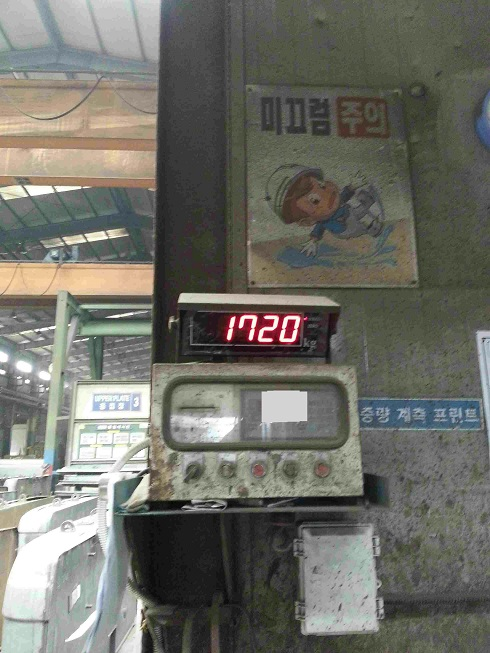

In [ ]:
from IPython.display import Image as show_image# ipynb 파일의 cell에서 이미지를 시각화하기 위한 라이브러리
show_image('notebook_images/covered_image_example.jpg')

- **YOLO 형식에 맞는 이미지의 어노테이션 파일 예시는 아래와 같습니다.**

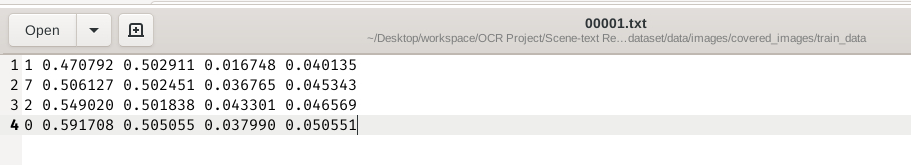

In [ ]:
show_image('notebook_images/det_text_sample.PNG')

- **YOLO에서 Data를 읽어오기 위한 YAML파일 예시는 아래와 같습니다.**

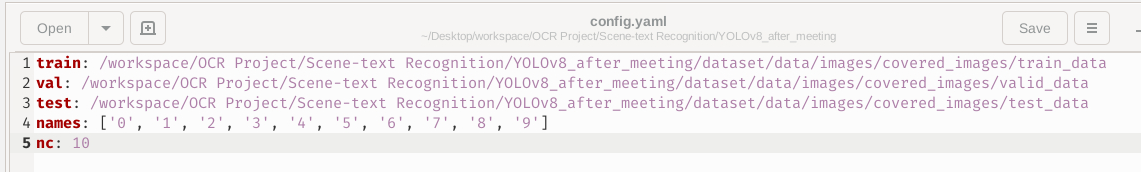

In [ ]:
show_image('notebook_images/yaml_sample.PNG')

- 보유하고 있는 이미지와 json파일로 위와 같은 형식의 이미지와 txt파일 그리고 yaml파일을 생성합니다.

### 필요 라이브러리 임포트

In [ ]:
import os                   # 시스템 경로 및 파일 관련 기능을 사용하기 위한 라이브러리
import json                 # JSON 데이터를 다루기 위한 라이브러리
import glob                 # 파일 패턴 매칭을 위한 라이브러리
import numpy as np          # 다차원 배열 및 수학 연산 처리를 위한 라이브러리
import pandas as pd         # 데이터프레임을 활용한 데이터 조작 및 분석을 위한 라이브러리
from ast import literal_eval  # 문자열을 코드로 변환하는 함수
from PIL import Image, ImageDraw  # 이미지 처리를 위한 라이브러리
import matplotlib.pyplot as plt  # 시각화를 위한 라이브러리
from tqdm import tqdm        # 반복문의 진행 상황을 표시하는 라이브러리
import random                # 랜덤 함수 사용을 위한 라이브러리
import yaml                  # yaml파일을 다루기 위한 라이브러리
from collections import OrderedDict # collections에서 제공하는 항목의 순서를 기억하는 딕셔너리
import shutil                # 파일의 이동과 복사를 위한 라이브러리

## YOLOv8 Custom Dataset 만들기

In [ ]:
# 공통 작업 - 파일 경로 지정
# 아래의 파일 경로는 실제 환경에 맞게 수정해 주시기 바랍니다.

# train, valid, test json 파일 경로 지정
train_label_path = './dataset/datalist/train_data.json'
valid_label_path = './dataset/datalist/valid_data.json'
test_label_path = './dataset/datalist/test_data.json'

# 원본 이미지 폴더(images)가 들어있는 경로 지정.
img_root_path = './dataset/data/images'

In [ ]:
# 작은 화면을 가린 이미지와 txt파일을 저장할 경로를 작성해 주세요
train_output_dir = './dataset/data/covered_images/train_data'
valid_output_dir = './dataset/data/covered_images/valid_data'
test_output_dir = './dataset/data/covered_images/test_data'

# 설정된 경로에 폴더를 생성합니다. 폴더가 이미 존재하는 경우 오류를 방지하기 위해 exist_ok=True 옵션을 사용합니다.
os.makedirs(train_output_dir, exist_ok=True)
os.makedirs(valid_output_dir, exist_ok=True)
os.makedirs(test_output_dir, exist_ok=True)

In [ ]:
# 필요한 함수를 미리 정의합니다.
def find_bigbox(bbox_info):
    '''
    이미지에서 큰 스크린의 좌표만 추출하는 함수
    큰 화면의 개별 bounding box와 작은 화면의 개별 bounding box 크기가 몇 배 이상 차이나는 것을 활용함
    모든 박스 중에서 가장 긴 세로길이를 추출하고, 해당 길이의 65% 미만의 세로길이를 가진 박스는 작은 박스로 간주하여 큰 박스 인덱스만 리턴
    '''
    bbox_info = np.array(bbox_info) # 리스트 어레이로 변환
    longest_length = max(bbox_info[:,7]-bbox_info[:,1]) # 좌하단y - 좌상단y 의 값중 가장 큰 값을 도출하여 가장 큰 숫자의 길이를 구함
    bigbox_coord_index = np.where(bbox_info[:,7]-bbox_info[:,1]>longest_length*0.65)[0] # 가장 큰 숫자의 65%보다 큰 bounding box만 도출
    return bigbox_coord_index

def find_smallbox(bbox_info):
    '''
    이미지에서 작은 스크린의 좌표만 추출하는 함수
    큰 화면의 개별 bounding box와 작은 화면의 개별 bounding box 크기가 몇 배 이상 차이나는 것을 활용함
    모든 박스 중에서 가장 작은 세로길이를 추출하고, 해당 길이의 150% 미만의 세로길이를 가진 박스는 작은 박스로 간주하여 작은 박스 인덱스만 리턴
    '''
    bbox_info = np.array(bbox_info) # 리스트 어레이로 변환
    shortest_length = min(bbox_info[:,7]-bbox_info[:,1]) # 좌하단y - 좌상단y 의 값중 가장 작은 값을 도출하여 가장 작은 숫자의 길이를 구함
    samllbox_coord_index = np.where(bbox_info[:,7]-bbox_info[:,1]<shortest_length*1.5)[0] # 가장 작은 숫자의 1.5배 보다 작은 bounding box만 도출
    return samllbox_coord_index

def find_rightmost(bigbox_index, sample_bbox_info):
    '''
    01908.jpg 이미지 같은 경우 텍스트 라벨링이 왼쪽->오른쪽 순서대로 되어 있지 않습니다.
    우상단 x좌표의 값을 이용해 가장 우측에 위치한 텍스트가 몇번째 bounding box인지 리턴합니다.
    '''
    rightmost_index = np.argmax(np.array(sample_bbox_info)[bigbox_index][:,2]) # bigbox 내에서 가장 오른쪽에 있는 인덱스를 도출함(bigbox내에서 몇번째인지)
    rightmost_index = bigbox_index[rightmost_index] # n번째 bbox 값 도출
    return rightmost_index

def get_righttext(bigbox_index, sample_bbox_info):
    text_order = np.argsort(np.array(sample_bbox_info)[:,0]) # 모든 박스를 x 순서대로 정렬합니다.
    bigbox_text_order = [x for x in text_order if x in bigbox_index] # 작은 박스에 해당하는 인덱스는 제거합니다.
    return bigbox_text_order # 글자 순서(x순서)대로 정렬된 x박스 순서를 반환합니다.

#### 작은 화면을 회색으로 가린 데이터(이미지) 생성

In [ ]:
# 작은 텍스트 부분이 가려진 이미지 생성
def make_covered_image(json_path, img_root_path, covered_image_path):
    """
    모델이 큰 화면에만 집중해서 학습할수 있도록 이미지의 특정 영역(작은 화면)을 가린채로 저장하는 함수.

    Parameters:
    - json_path: JSON 어노테이션 파일의 경로
    - img_root_path: 원본 이미지가 저장된 경로
    - covered_image_path: 가려진 이미지를 저장할 경로
    """

    # JSON 파일 로드
    with open(json_path) as load_f:
        json_flie = json.load(load_f)

    # 파일명을 기준으로 JSON 데이터를 순회
    for filename in tqdm(json_flie):

        label_info = json_flie[filename]

        # 이미지 파일 로드
        sample_image = Image.open(f'{img_root_path}/{filename.replace("images/", "")}')  # 기존 파일명이 "images/파일명.jpg"
                                                                                         # 라서 images/ 뒤의 파일명만을 이용
        # Bounding Box 정보 추출
        sample_bbox_info = np.array(label_info['content_ann']['bboxes']) # 좌표 정보 추출

        # 큰 화면의 bbox 인덱스를 추출
        bigbox_index = find_bigbox(sample_bbox_info) #큰 화면의 bbox 좌표 인덱스 추출
        # 큰 화면의 bbox 인덱스를 제외시켜 작은 화면의 bbox 인덱스를 추출
        smallbox_list = np.delete(sample_bbox_info,bigbox_index,0) #작은 화면의 bbox 정보만 추출

        draw = ImageDraw.Draw(sample_image, 'RGBA')
        box_color_RGBA  = (211,211,211) # 테두리 색깔 결정
        fill_color_RGBA = (211,211,211) # 채우기 색깔 결정

        # smallbox 로 탐지된 좌표에 대해서만 bounding box 를 활용하여 회색으로 가려줍니다.
        for box in smallbox_list:
            draw.rectangle((box[0]-50,box[1]-50,box[4]+50,box[5]+50), outline=box_color_RGBA, fill=fill_color_RGBA, width = 3)

        # 작은 글자가 회색으로 가려진 이미지 저장
        sample_image.save(f'{covered_image_path}/{filename.replace("images/", "")}')

In [ ]:
# 아래쪽 작은 패널이 회색으로 가려진 이미지 생성
make_covered_image('dataset/datalist/train_data.json', img_root_path, train_output_dir)
make_covered_image('dataset/datalist/valid_data.json', img_root_path, valid_output_dir)
make_covered_image('dataset/datalist/test_data.json', img_root_path, test_output_dir)

100%|██████████| 390/390 [00:25<00:00, 15.04it/s]


#### 작은 화면을 회색으로 가린 데이터(어노테이션) 생성

In [ ]:
def json_to_yolo_format(json_path, output_dir):
    """
    JSON 어노테이션을 YOLO 형식의 .txt 파일로 변환합니다.

    Parameters:
    - json_path: JSON 어노테이션 파일의 경로
    - output_dir: YOLO 어노테이션을 저장할 폴더 경로
    """

    # JSON 파일 로드
    with open(json_path) as load_f:
        json_file = json.load(load_f)

    # 파일명을 기준으로 JSON 데이터를 순회
    for filename, meta in tqdm(json_file.items()):

        img_height = meta['height'] # 해당 이미지의 높이
        img_width = meta['width'] # 해당 이미지의 너비

        # 큰 화면의 bbox 인덱스를 추출
        bbox_info = np.array(meta['content_ann']['bboxes'])
        bigbox_index = find_bigbox(bbox_info)
        bigboxes = bbox_info[bigbox_index]

        # 큰 화면의 바운딩 박스를 왼쪽에서 오른쪽 순으로 정렬
        sorted_boxes = sorted(list(zip(bigboxes, bigbox_index)), key=lambda x: x[0][0])
        sorted_bigboxes, sorted_indexes = zip(*sorted_boxes)

        yolo_boxes = []
        for idx, box in enumerate(sorted_bigboxes):
            # YOLO 포맷에 맞게 bbox 변환
            x_center = (box[0] + box[2]) / 2.0 # 좌상단 x좌표와 우상단 x좌표의 절반
            y_center = (box[1] + box[5]) / 2.0 # 좌상단 y좌표와 우하단 y좌표의 절반
            width = box[2] - box[0] # 해당 바운딩 박스의 너비(우상단 x좌표 - 좌상단 x좌표)
            height = box[5] - box[1] # 해당 바운딩 박스의 높이(우하단 y좌표 - 좌상단 y좌표)

            # 바운딩 박스의 좌표를 해당 이미지의 너비와 높이로 정규화
            x_center /= img_width
            y_center /= img_height
            width /= img_width
            height /= img_height

            # 클래스 정보
            class_id = meta['content_ann']['texts'][sorted_indexes[idx]]  # 큰 화면의 bbox에 해당하는 클래스 추출
            yolo_boxes.append((class_id, x_center, y_center, width, height))

        # 파일 저장
        with open(f"{output_dir}/{filename.replace('images/', '').replace('.jpg', '.txt')}", "w") as txt_file:
            for box in yolo_boxes:
                txt_file.write(f"{box[0]} {box[1]:.6f} {box[2]:.6f} {box[3]:.6f} {box[4]:.6f}\n")

In [ ]:
# 아래쪽 작은 패널이 회색으로 가려진 이미지에 대한 어노테이션 생성
json_to_yolo_format(train_label_path, train_output_dir)
json_to_yolo_format(valid_label_path, valid_output_dir)
json_to_yolo_format(test_label_path, test_output_dir)

100%|██████████| 390/390 [00:00<00:00, 7241.29it/s]


#### YOLO에서 데이터를 활용하기 위한 config.yaml 파일 생성

In [ ]:
# yaml 파일의 내용을 순서를 기억하는 딕셔너리를 사용해서 생성
data_dict = OrderedDict({
    # 해당 경로는 절대경로 형태로 기입이 필요합니다. 그렇지 않을 경우 자체적으로 절대경로를 만드는 과정에서 에러가 발생할 수 있습니다.
    "train": os.path.abspath("./dataset/data/covered_images/train_data"),
    "val": os.path.abspath("./dataset/data/covered_images/valid_data"),
    "test": os.path.abspath("./dataset/data/covered_images/test_data"),
    "names": ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
    "nc": 10
})

# dumper.represent_dict는 OrderedDict객체를 yaml 형식으로 매핑 하기 위한 함수
def ordered_dict_representer(dumper, data):
    return dumper.represent_dict(data.items())

# OrderedDict객체를 yaml 형식으로 매핑하여 yaml 타입으로 변환
# Dumper=yaml.SafeDumper는 PyYAML에서 제공하는 안전한 Dumper 임의의 파이썬 코드 실행을 방지하기 위함
yaml.add_representer(OrderedDict, ordered_dict_representer, Dumper=yaml.SafeDumper)

# config.yaml을 쓰기(w)모드로 연 후, outfile로 참조
# dump 함수로 파이썬 객체를 yaml 형식의 문자열로 직렬화(여기서는 data_dict)
# outfile - yaml 형식의 문자열이 쓰여질 파일 객체
# default_flow_style - YAML에는 block 스타일과 flow 스타일로 데이터를 표현할 수 있는데, 디폴트는 flow 스타일
# Block 스타일 예시 : key1 : value1
# flow 스타일 예시 : {key1: value1}
with open("config.yaml", 'w') as outfile:
    yaml.dump(data_dict, outfile, Dumper=yaml.SafeDumper, default_flow_style=None)

In [ ]:
with open(test_label_path, 'r', encoding="utf-8") as f:
    test_data = json.load(f)

# 화면이 가려지지 않은 테스트 이미지를 저장할 디렉터리 경로
real_test_path = './dataset/data/real_test_images'

# 디렉터리 생성 (이미 디렉터리가 존재하지 않는 경우에만)
if not os.path.exists(real_test_path):
    os.makedirs(real_test_path)

# test_data.json에서 이미지 파일명 추출 및 해당 이미지를 real_test_path로 복사
for filename in test_data.keys():
    # 파일 경로 생성
    src_path = os.path.join(img_root_path, filename.replace('images/', ''))
    dest_path = os.path.join(real_test_path, filename.replace('images/', ''))

    # 이미지 복사
    shutil.copy(src_path, dest_path)

print(f"Test images copied to {real_test_path}")

Test images copied to ./dataset/data/real_test_images


# Model_train_eval_inference

# 개별 숫자 단위의 정확도 계산을 위한 함수 정의
- 전체 숫자가 불일치 하더라도, 일치하는 숫자의 부분 점수를 계산 가능

In [ ]:
def compute_each_label_accuracy(label_path: str, inference_results: list) -> float:
    # 실제 라벨 값들을 저장하기 위한 딕셔너리
    true_labels = {}
    # 지정된 경로의 모든 파일을 순회
    for file in os.listdir(label_path):
        # 파일 확장자가 .txt인 경우만 처리
        if file.endswith('.txt'):
            # 해당 파일을 열어서 내용을 road함
            with open(os.path.join(label_path, file), 'r') as f:
                lines = f.readlines()
                # 각 줄에서 클래스 번호만 추출하여 리스트에 저장
                classes = [int(line.strip().split()[0]) for line in lines]
                true_labels[file] = classes # 파일 이름을 키로 하고, 추출된 클래스들을 값으로 하는 항목을 딕셔너리에 추가

    # 예측된 라벨 값들을 저장하기 위한 딕셔너리
    predicted_labels = {}
    # 추론 결과를 순회
    for result in inference_results:
        # 각 바운딩 박스의 x좌표를 기준으로 데이터를 정렬
        sorted_data = sorted(result.boxes.data.tolist(), key=lambda x: x[0])
        # 정렬된 데이터에서 클래스 번호(맨 마지막 값)만 추출하여 리스트에 저장
        classes = [int(item[-1]) for item in sorted_data]
        # 이미지 파일 이름을 키로 하고, 추출된 클래스들을 값으로 하는 항목을 딕셔너리에 추가
        predicted_labels[os.path.basename(result.path)] = classes

    # 정확도를 계산하기 위한 변수 초기화
    total_count = 0
    correct_count = 0
    # 실제 라벨 값을 순회
    for filename, true_classes in true_labels.items():
        # 예측된 라벨 값 중에서 해당 이미지 파일의 라벨 값을 가져옴 (없으면 빈 리스트를 사용)
        pred_classes = predicted_labels.get(filename.replace('.txt', '.jpg'), []) # 이미지 파일 확장자가 .jpg라고 가정
        # 전체 라벨 수를 누적
        total_count += len(true_classes)
        # 일치하는 라벨 수를 누적
        correct_count += sum(t == p for t, p in zip(true_classes, pred_classes))

    # 전체 라벨 수가 0이면 정확도도 0으로 설정
    accuracy = 0 if total_count == 0 else correct_count / total_count

    # 정확도, total_count, correct_count를 반환
    return accuracy, total_count, correct_count

## 개별 이미지 기준 정확도 계산을 위한 함수 정의
- 예측한 숫자 전체가 일치해야 정답

In [ ]:
def compute_image_accuracy(label_path: str, inference_results: list) -> (float, int, int):
    # 실제 라벨을 추출
    true_labels = {}
    for file in os.listdir(label_path):
        if file.endswith('.txt'):
            with open(os.path.join(label_path, file), 'r') as f:
                lines = f.readlines()
                classes = [int(line.strip().split()[0]) for line in lines]
                true_labels[file] = classes

    # 예측된 결과 가져오기
    predicted_labels = {}
    for result in inference_results:
        # 각 바운딩 박스의 x좌표를 기준으로 정렬
        sorted_data = sorted(result.boxes.data.tolist(), key=lambda x: x[0])
        # 정렬된 결과에서 클래스만 추출
        classes = [int(item[-1]) for item in sorted_data]
        predicted_labels[os.path.basename(result.path)] = classes

    # 실제 라벨을 기준으로 예측 라벨과 비교하여 accuracy_score 계산
    total_images = len(true_labels)
    correct_images = 0
    for filename, true_classes in true_labels.items():
        pred_classes = predicted_labels.get(filename.replace('.txt', '.jpg'), []) # Assuming your images are in .jpg format

        if true_classes == pred_classes:
            correct_images += 1

    accuracy = correct_images / total_images if total_images > 0 else 0

    return accuracy, total_images, correct_images

# Load a pre-trained model

In [ ]:
!pip3 install ultralytics # 처음 설치 시 실행 후 런타임 재시작 필요

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 47.2 MB/s eta 0:00:00


In [ ]:
import ultralytics
from ultralytics import YOLO
from IPython.display import Image as show_image
import glob
import random
import matplotlib.pyplot as plt
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/235.7 GB disk)


In [ ]:
model = YOLO('yolov8n.pt') #yolov8n(나노), yolov8s(스몰), yolov8m(미디움), yolov8l(라지), yolov8x(엑스트라) 등이 있음

100%|██████████| 6.23M/6.23M [00:00<00:00, 86.8MB/s]


In [ ]:
print(type(model.names), len(model.names)) #yolov8은 MX COCO 데이터로 사전학습되어 있기 때문에, MS COCO Dataset에 정의되어
print(model.names)                         #있는 클래스 개수와 종류는 model.names를 통해서 확인할 수 있음 (총 80개, 0~79)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

# YOLOv8 커스텀 데이터 학습하기

In [ ]:
project = "./runs/detect"
name = "train"

dataset_path = "config.yaml"

In [ ]:
model.train(
    data=dataset_path, # 데이터셋 경로(yaml파일)
    epochs=30, # 최대 학습 epoch
    project=project, # project 폴더 이름
    name=name, # experiment 폴더 이름
    exist_ok=False, # 덮어쓰기 여부
    seed=42, # 재현성을 위한 시드 설정
    optimizer='AdamW', # optimizer는 AdamW로 지정
    patience=5, # 30epoch동안 loss가 개선되지 않으면 종료
    batch=32, # 훈련 배치 사이즈는 16
    imgsz=832, # 이미지 사이즈는 832
    degrees=0.15, # 이미지 회전 -15'~15'
    fliplr=0 # 이미지 좌우 반전 확률은 0으로 지정 ("2"와 "5" 혼동을 막기 위함)
)

Ultralytics YOLOv8.0.220 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=config.yaml, epochs=30, patience=30, batch=32, imgsz=832, save=True, save_period=-1, cache=False, device=None, workers=8, project=./runs/detect, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscrip

100%|██████████| 755k/755k [00:00<00:00, 23.0MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/dataset/data/covered_images/train_data... 3001 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3001/3001 [00:01<00:00, 2157.51it/s]


train: New cache created: /content/dataset/data/covered_images/train_data.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/data/covered_images/valid_data... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<00:00, 1082.35it/s]

val: New cache created: /content/dataset/data/covered_images/valid_data.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 832 train, 832 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      8.07G      1.064      1.671     0.9911        177        832: 100%|██████████| 94/94 [04:33<00:00,  2.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:29<00:00,  3.72s/it]

                   all        500       2023      0.717      0.543        0.7       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      7.54G     0.9616     0.6891     0.9729        182        832: 100%|██████████| 94/94 [04:29<00:00,  2.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:28<00:00,  3.54s/it]

                   all        500       2023      0.958      0.883      0.946        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      7.56G     0.9241     0.5933     0.9683        135        832: 100%|██████████| 94/94 [04:25<00:00,  2.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:27<00:00,  3.44s/it]

                   all        500       2023      0.932      0.906      0.954      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      7.49G     0.9037     0.5652     0.9604        185        832: 100%|██████████| 94/94 [04:24<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:30<00:00,  3.84s/it]

                   all        500       2023      0.895      0.869      0.947      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      7.54G     0.8899     0.5276     0.9459        191        832: 100%|██████████| 94/94 [04:30<00:00,  2.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:28<00:00,  3.61s/it]

                   all        500       2023       0.96      0.904      0.953      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      7.49G     0.9092     0.5086     0.9639        178        832: 100%|██████████| 94/94 [04:29<00:00,  2.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:30<00:00,  3.76s/it]

                   all        500       2023      0.953      0.935      0.968      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30       7.5G     0.8624     0.4874     0.9412        165        832: 100%|██████████| 94/94 [04:32<00:00,  2.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:30<00:00,  3.78s/it]

                   all        500       2023       0.97      0.939      0.968      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      7.59G      0.854     0.4781     0.9442        198        832: 100%|██████████| 94/94 [04:32<00:00,  2.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:30<00:00,  3.82s/it]

                   all        500       2023      0.978      0.948       0.97      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      7.53G     0.8394     0.4563     0.9297        180        832: 100%|██████████| 94/94 [04:41<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:29<00:00,  3.74s/it]

                   all        500       2023      0.959      0.933      0.968      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      7.53G     0.8526     0.4587     0.9364        186        832: 100%|██████████| 94/94 [04:56<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:29<00:00,  3.72s/it]

                   all        500       2023       0.98      0.957      0.973      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      7.58G     0.8323     0.4502     0.9326        158        832: 100%|██████████| 94/94 [04:41<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:29<00:00,  3.74s/it]

                   all        500       2023      0.979      0.955      0.973       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      7.53G     0.8315     0.4398     0.9332        166        832: 100%|██████████| 94/94 [04:39<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:30<00:00,  3.83s/it]

                   all        500       2023       0.97      0.951      0.975      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      7.54G     0.8179     0.4383     0.9265        167        832: 100%|██████████| 94/94 [04:37<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:31<00:00,  3.88s/it]

                   all        500       2023      0.983      0.956      0.976       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      7.53G     0.8226     0.4292     0.9263        152        832: 100%|██████████| 94/94 [04:38<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:29<00:00,  3.65s/it]

                   all        500       2023      0.981      0.955      0.977      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      7.53G     0.8113     0.4276     0.9301        158        832: 100%|██████████| 94/94 [04:33<00:00,  2.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:31<00:00,  3.98s/it]

                   all        500       2023      0.984      0.955      0.975      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      7.49G     0.8017     0.4163     0.9212        162        832: 100%|██████████| 94/94 [04:30<00:00,  2.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:31<00:00,  3.91s/it]

                   all        500       2023      0.976      0.952      0.971      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      7.49G     0.8029     0.4145     0.9231        204        832: 100%|██████████| 94/94 [04:29<00:00,  2.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:30<00:00,  3.80s/it]

                   all        500       2023      0.988      0.965      0.979      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      7.49G     0.7928     0.4097     0.9178        157        832: 100%|██████████| 94/94 [04:34<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:28<00:00,  3.61s/it]

                   all        500       2023      0.982      0.962      0.979      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      7.53G     0.7855      0.402     0.9177        172        832: 100%|██████████| 94/94 [04:38<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:25<00:00,  3.23s/it]

                   all        500       2023      0.988      0.961       0.98      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.59G     0.8051     0.4027     0.9236        192        832: 100%|██████████| 94/94 [04:31<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:30<00:00,  3.80s/it]

                   all        500       2023      0.988      0.961       0.98      0.764


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.53G     0.7811      0.372     0.9481         96        832: 100%|██████████| 94/94 [04:40<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:27<00:00,  3.49s/it]

                   all        500       2023       0.98      0.952      0.972      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.52G     0.7854     0.3703     0.9503         93        832: 100%|██████████| 94/94 [04:25<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:29<00:00,  3.70s/it]


                   all        500       2023      0.986      0.963      0.981      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.52G     0.7775     0.3644      0.953        102        832: 100%|██████████| 94/94 [04:27<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:30<00:00,  3.86s/it]

                   all        500       2023      0.987      0.965      0.982      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      7.54G     0.7664     0.3563     0.9442         92        832: 100%|██████████| 94/94 [04:27<00:00,  2.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:27<00:00,  3.48s/it]

                   all        500       2023      0.987      0.964      0.981      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.52G      0.764     0.3516     0.9415         98        832: 100%|██████████| 94/94 [04:20<00:00,  2.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:29<00:00,  3.70s/it]

                   all        500       2023      0.982      0.966      0.982      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      7.53G     0.7608      0.348     0.9438        101        832: 100%|██████████| 94/94 [04:22<00:00,  2.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:29<00:00,  3.67s/it]

                   all        500       2023      0.989      0.965      0.984      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      7.52G     0.7587     0.3435      0.939        100        832: 100%|██████████| 94/94 [04:24<00:00,  2.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:31<00:00,  3.90s/it]

                   all        500       2023      0.987      0.967      0.983      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      7.54G     0.7514     0.3347     0.9433        101        832: 100%|██████████| 94/94 [04:21<00:00,  2.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:30<00:00,  3.84s/it]

                   all        500       2023      0.988      0.965      0.984      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      7.52G     0.7439     0.3296     0.9398         99        832: 100%|██████████| 94/94 [04:19<00:00,  2.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:29<00:00,  3.70s/it]

                   all        500       2023      0.985      0.965      0.984      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      7.55G     0.7384     0.3236     0.9283        100        832: 100%|██████████| 94/94 [04:24<00:00,  2.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:27<00:00,  3.45s/it]

                   all        500       2023      0.986      0.967      0.984      0.773



30 epochs completed in 2.525 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.220 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:43<00:00,  5.49s/it]


                   all        500       2023      0.986      0.967      0.984      0.773
                     0        500        689      0.994      0.989      0.994      0.822
                     1        500        187      0.945      0.911      0.952      0.541
                     2        500        234      0.991      0.974      0.993      0.818
                     3        500        265      0.989      0.985      0.994      0.799
                     4        500         94      0.993      0.968       0.99      0.795
                     5        500         98      0.979      0.946      0.981      0.768
                     6        500        212      0.995      0.989      0.994      0.807
                     7        500         86      0.994      0.988      0.989      0.805
                     8        500        109      0.989      0.982      0.993      0.774
                     9        500         49      0.987      0.939      0.961      0.799
Speed: 0.3ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7acf3ceb2ad0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [ ]:
print(type(model.names), len(model.names))
print(model.names)

<class 'dict'> 10
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}


### 학습 시 Loss 및 성능 지표 변화 시각화
 - 이미지에는 객체 감지 모델인 YOLO의 학습 및 검증 과정에서의 다양한 손실(loss) 및 성능 지표(metrics)의 변화를 보여주는 그래프들이 포함되어 있습니다. 각 그래프의 상단에는 학습 데이터셋에 대한 지표가, 하단에는 검증 데이터셋에 대한 지표가 나타나 있습니다.

 - train/box_loss 및 val/box_loss: 객체의 경계 상자(bounding box)에 대한 손실을 나타냅니다. 손실이 낮을수록 모델이 객체의 위치를 더 정확하게 예측하고 있음을 의미합니다. 두 그래프 모두 손실이 시간이 지남에 따라 감소하는 경향을 보이고 있으며, 이는 모델이 학습을 통해 성능이 향상되고 있음을 나타냅니다.

- train/cls_loss 및 val/cls_loss: 클래스 분류에 대한 손실을 나타냅니다. 이 값도 낮을수록 좋으며, 시간이 지남에 따라 감소하는 것으로 보아 모델이 객체의 클래스를 정확하게 분류하고 있음을 알 수 있습니다.

- train/df_fl_loss 및 val/df_fl_loss: 디폴트(focal loss) 손실을 나타내는 것으로 보입니다. 이 또한 감소하는 경향을 보여 학습이 잘 진행되고 있음을 나타냅니다.

- metrics/precision(B) 및 metrics/recall(B): 정밀도(precision)와 재현율(recall) 지표입니다. 정밀도는 모델이 예측한 것 중 실제로 맞는 비율, 재현율은 실제 객체 중 모델이 맞춘 비율을 나타냅니다. 두 지표 모두 높을수록 성능이 좋다고 할 수 있으며, 그래프는 두 지표가 높은 값을 유지하고 있음을 보여줍니다.

- metrics/mAP50(B) 및 metrics/mAP50-95(B): 평균 정밀도(mAP)의 변화를 나타내며, mAP50은 IoU(Intersection over Union) 임계값이 0.50일 때, mAP50-95는 IoU 임계값이 0.50에서 0.95까지의 평균을 나타냅니다. 이 지표는 객체 감지 모델의 전반적인 성능을 나타내며, 높은 mAP 값은 모델이 정확한 객체 감지를 수행하고 있음을 의미합니다. 그래프는 두 지표 모두 학습에 따라 향상되고 있음을 나타냅니다.

- 이러한 그래프들은 모델이 학습 과정에서 안정적으로 성능을 향상시키고 있으며, 특히 검증 데이터셋에 대한 손실과 성능 지표가 지속적으로 개선되고 있음을 나타냅니다. 이것은 모델이 과적합 없이 일반화를 잘 하고 있음을 시사합니다.

- 각 그래프에는 실제 데이터 포인트(파란색 점)와 이를 부드럽게 연결한 추세선(주황색 점선)이 함께 나타나 있어, 전반적인 경향성을 쉽게 파악할 수 있도록 도와줍니다.

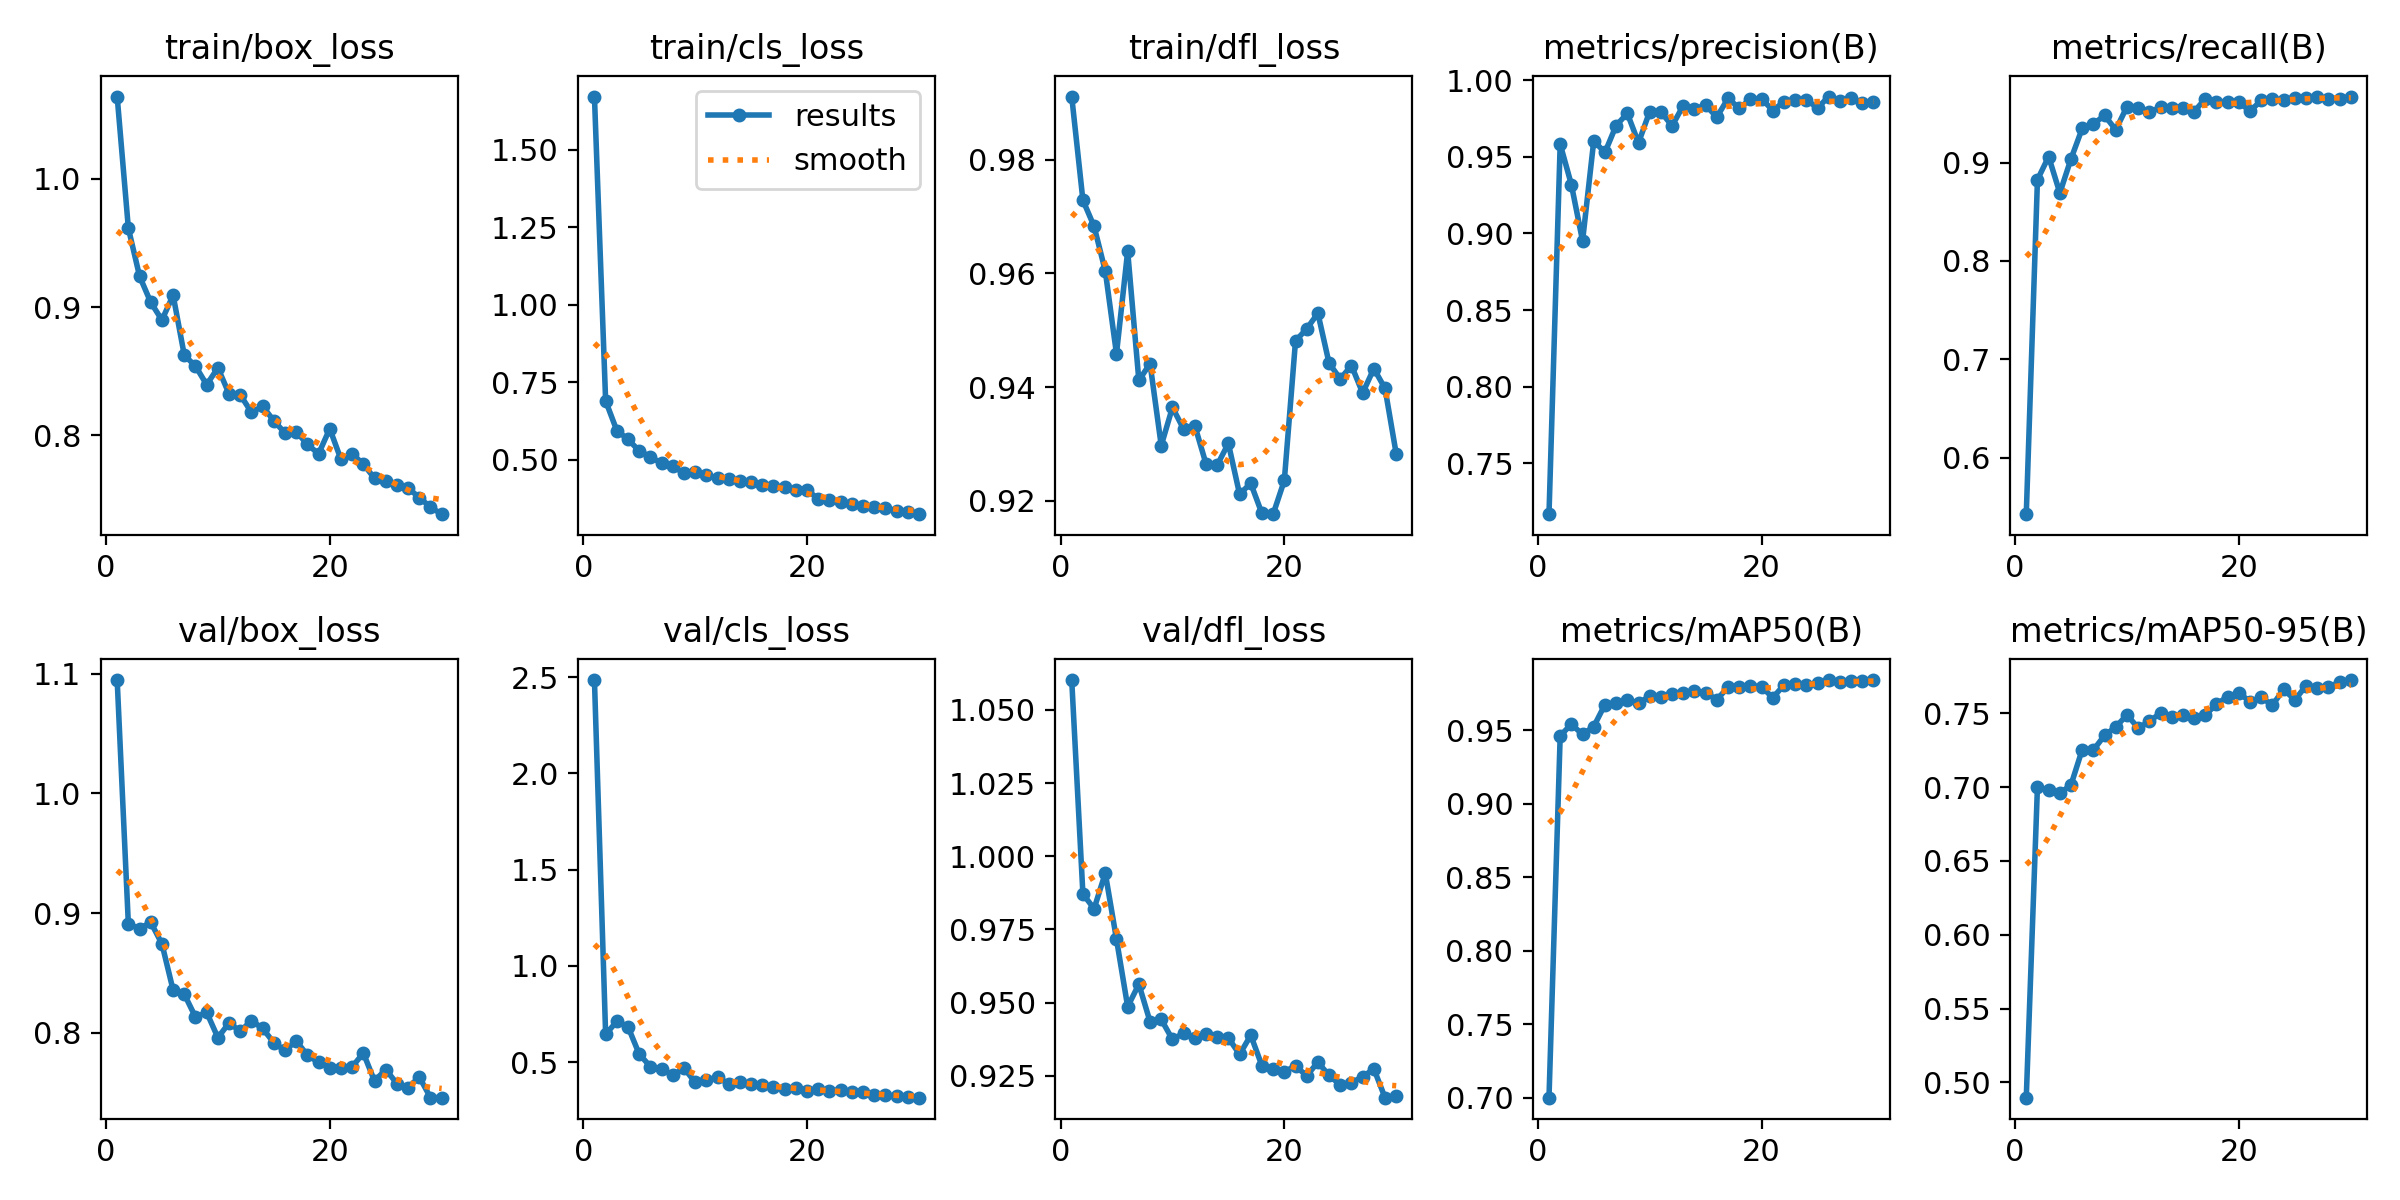

In [ ]:
show_image(f"{project}/{name}/results.png", width=800)

# Best.pt Load

In [ ]:
# 최적의 성능을 보인 모델 가중치 불러오기
# 학습 과정 중 검증 데이터셋에 대해 가장 높은 성능을 보인 시점의 모델 가중치를 로드합니다.
model = YOLO(f"{project}/{name}/weights/best.pt")

In [ ]:
print(type(model.names), len(model.names))
print(model.names)

<class 'dict'> 10
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}


# Model evaluation (best epoch)
- 이 과정에서는 앞서 불러온 최적의 모델 가중치를 사용하여 검증 데이터셋과 테스트 데이터셋의 성능을 평가합니다.
- 이를 통해 모델의 일반화 능력과 실제 성능을 확인할 수 있습니다.

## Test dataset evaluation (작은 부분 가려진 이미지)

In [ ]:
test_name = "test_result" # 테스트 결과를 저장할 폴더 이름 설정
test_result = model.val(imgsz=640, split="test", name=test_name) # 테스트 데이터셋 평가 실행

Ultralytics YOLOv8.0.220 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/dataset/data/covered_images/test_data... 390 images, 0 backgrounds, 0 corrupt: 100%|██████████| 390/390 [00:01<00:00, 367.97it/s]

val: New cache created: /content/dataset/data/covered_images/test_data.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:31<00:00,  1.26s/it]


                   all        390       1569      0.982      0.956      0.977      0.768
                     0        390        530      0.985      0.977      0.994      0.815
                     1        390        139      0.968      0.882      0.922      0.567
                     2        390        188      0.989      0.952      0.971       0.77
                     3        390        200      0.993       0.98      0.987      0.797
                     4        390         81      0.987      0.972      0.988      0.794
                     5        390        106      0.992      0.925      0.966      0.738
                     6        390        153      0.996      0.967      0.987       0.79
                     7        390         56      0.988      0.946      0.992       0.79
                     8        390         84      0.944      0.988      0.991      0.829
                     9        390         32      0.979      0.969      0.969      0.795
Speed: 0.2ms preproce

### 테스트 데이터셋 결과를 혼동 행렬 이미지로 시각화
- 이 히트맵은 모델이 0부터 9까지의 숫자를 얼마나 잘 분류하는지를 보여줍니다.
- 각 열은 실제 라벨을, 각 행은 모델이 예측한 라벨을 나타냅니다.
- 대각선 상의 값이 높으면 높을수록 모델의 예측 정확도가 높음을 의미합니다.
- 이 히트맵에서는 모든 클래스(0~9)가 90% 이상의 높은 정확도로 잘 예측되었음을 확인할 수 있습니다.
- 이는 모델이 각 클래스를 정확하게 분류하는 데 효과적임을 나타냅니다.
- 모든 클래스(0~9)가 90% 이상의 높은 정확도로 잘 예측되었음을 확인할 수 있습니다.

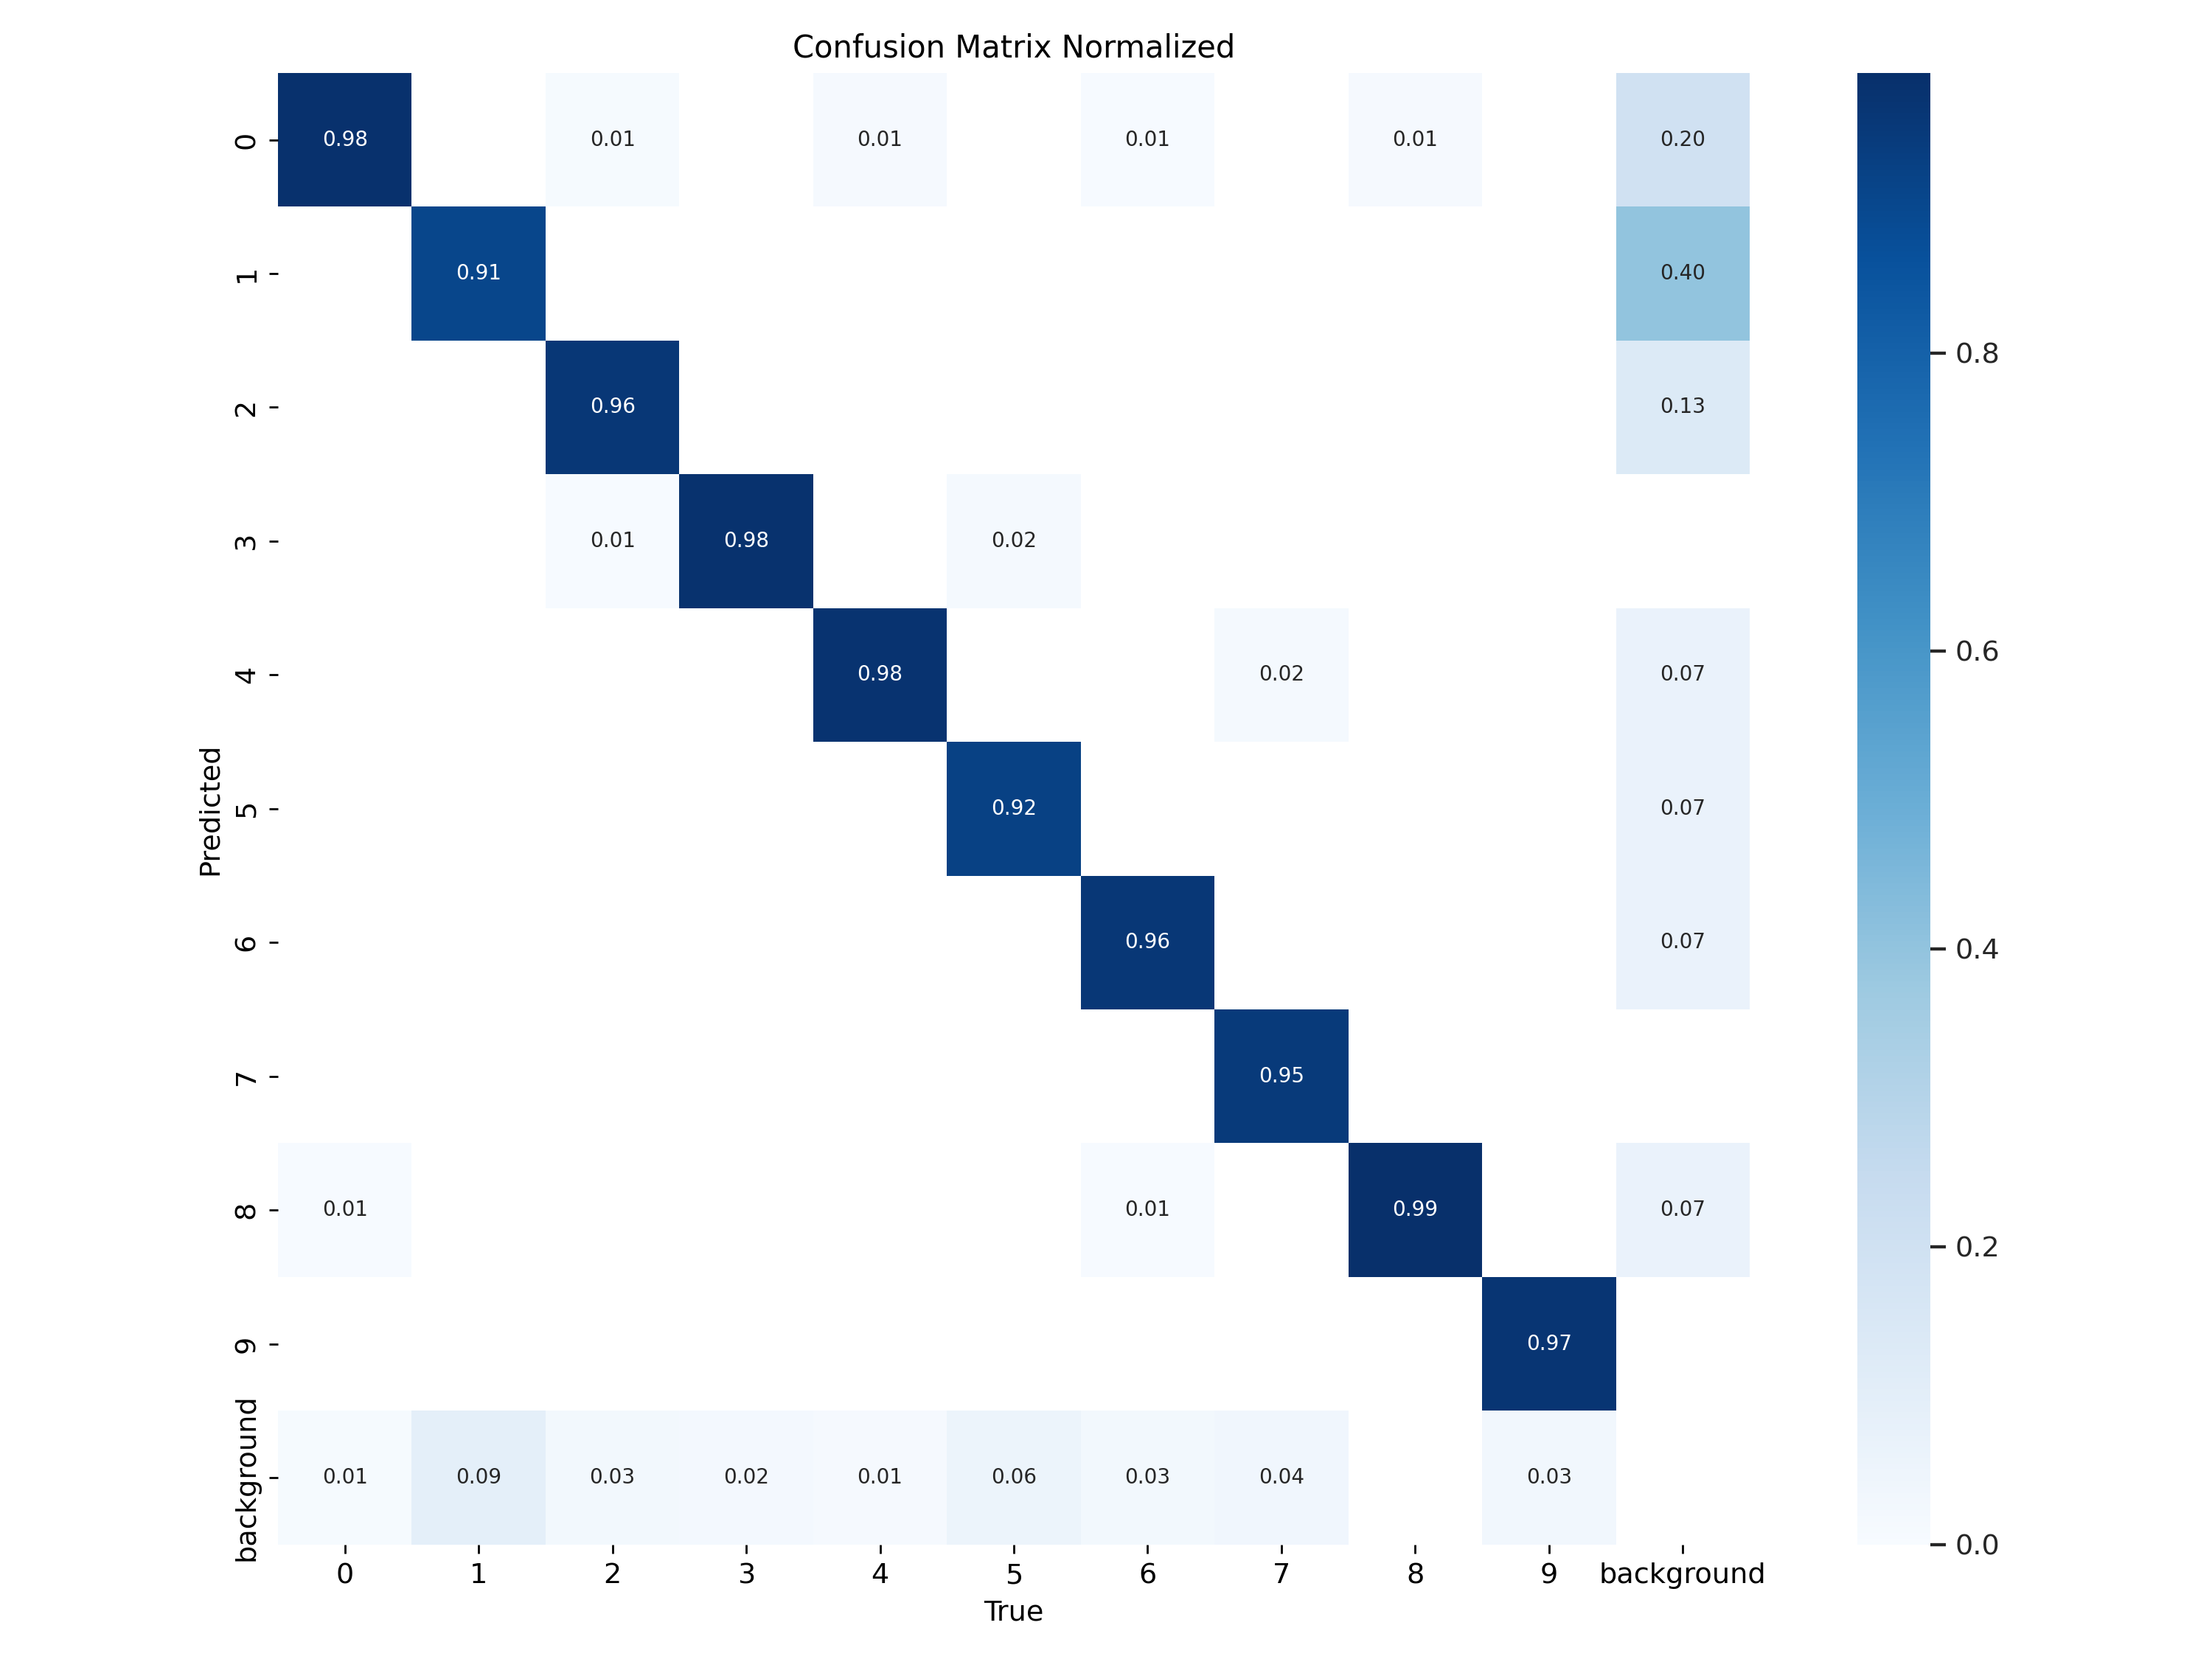

In [ ]:
# 테스트 데이터셋 결과를 혼동 행렬 이미지로 시각화
show_image(f"runs/detect/test_result/confusion_matrix_normalized.png", width=800, height=800)

# Inference with Test dataset

In [ ]:
test_inference_name = "test_predict"
image_paths = glob.glob('./dataset/data/covered_images/test_data/*jpg')
# 설정한 배치 크기
batch_size = 4

# 이미지 경로를 배치 크기에 맞춰 분할
test_inference_results = []
for i in tqdm(range(0, len(image_paths), batch_size)):
    batch_paths = image_paths[i:i + batch_size]
    results = model.predict(project=project,
                            source=batch_paths,
                            name=test_inference_name,
                            device='cuda',
                            imgsz=832, save=True,
                            save_txt=True,
                            save_conf=True,
                            show_conf=False,
                            exist_ok=True)

    # 결과에서 원본 이미지 삭제하여 메모리 절약
    for item in results:
        del item.orig_img
    test_inference_results.append(results)
# 배치사이즈 만큼 묶여 있는 리스트를 풀어줌
test_inference_results = sum(test_inference_results,[])

  0%|          | 0/98 [00:00<?, ?it/s]


0: 832x640 2 0s, 1 3, 1 6, 1: 832x640 1 0, 1 1, 1 2, 1 6, 2: 832x640 1 0, 1 3, 1 6, 1 8, 3: 832x640 2 0s, 1 3, 1 8, 59.9ms
Speed: 4.4ms preprocess, 15.0ms inference, 2.0ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
4 labels saved to runs/detect/test_predict/labels


  1%|          | 1/98 [00:01<01:56,  1.20s/it]


0: 832x640 1 0, 2 1s, 1 5, 1: 832x640 1 0, 1 2, 1 6, 1 8, 2: 832x640 3 0s, 1 1, 1 7, 3: 832x640 1 0, 1 5, 28.0ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
8 labels saved to runs/detect/test_predict/labels


  2%|▏         | 2/98 [00:02<01:50,  1.15s/it]


0: 832x640 1 0, 1 2, 1 6, 1 9, 1: 832x640 1 0, 1 2, 1 3, 1 4, 2: 832x640 2 0s, 1 2, 1 6, 3: 832x640 2 0s, 1 3, 1 8, 28.0ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
12 labels saved to runs/detect/test_predict/labels


  3%|▎         | 3/98 [00:03<01:41,  1.07s/it]


0: 832x640 2 0s, 3 5s, 1: 832x640 2 0s, 1 1, 1 9, 2: 832x640 2 0s, 1 5, 1 6, 3: 832x640 1 0, 28.0ms
Speed: 4.2ms preprocess, 7.0ms inference, 2.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
16 labels saved to runs/detect/test_predict/labels


  4%|▍         | 4/98 [00:04<01:38,  1.04s/it]


0: 832x640 2 0s, 1 2, 1 6, 1: 832x640 2 0s, 1 7, 2: 832x640 1 0, 1 1, 1 7, 1 9, 3: 832x640 3 0s, 1 7, 28.0ms
Speed: 4.2ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
20 labels saved to runs/detect/test_predict/labels


  5%|▌         | 5/98 [00:05<01:34,  1.01s/it]


0: 832x640 1 0, 1 2, 1: 832x640 1 0, 1 1, 3 3s, 1 8, 2: 832x640 1 0, 1 1, 1 3, 1 6, 3: 832x640 1 0, 1 3, 1 5, 1 8, 28.0ms
Speed: 4.5ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
24 labels saved to runs/detect/test_predict/labels


  6%|▌         | 6/98 [00:06<01:34,  1.02s/it]


0: 832x640 2 0s, 1 1, 1 3, 1: 832x640 1 0, 1 2, 1 3, 1 7, 2: 832x640 1 0, 1 1, 1 2, 1 5, 3: 832x640 1 0, 1 2, 2 6s, 28.1ms
Speed: 4.3ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
28 labels saved to runs/detect/test_predict/labels


  7%|▋         | 7/98 [00:07<01:31,  1.01s/it]


0: 832x640 1 0, 1 2, 1 3, 1 8, 1: 832x640 1 0, 1 1, 1 3, 1 6, 2: 832x640 3 0s, 1 1, 1 7, 3: 832x640 2 0s, 1 2, 1 7, 28.0ms
Speed: 4.3ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
32 labels saved to runs/detect/test_predict/labels


  8%|▊         | 8/98 [00:08<01:30,  1.00s/it]


0: 832x832 2 0s, 1 2, 1 5, 1: 832x832 1 0, 1 2, 1 3, 1 4, 2: 832x832 2 0s, 2 2s, 3: 832x832 1 0, 1 3, 2 4s, 56.7ms
Speed: 5.1ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/test_predict
36 labels saved to runs/detect/test_predict/labels


  9%|▉         | 9/98 [00:09<01:25,  1.05it/s]


0: 832x640 1 0, 1 3, 1 4, 1 8, 1: 832x640 2 0s, 1 4, 1 6, 2: 832x640 1 0, 1 3, 1 4, 1 6, 3: 832x640 1 0, 2 3s, 1 4, 28.7ms
Speed: 4.1ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
40 labels saved to runs/detect/test_predict/labels


 10%|█         | 10/98 [00:10<01:32,  1.05s/it]


0: 832x640 1 0, 1 1, 1 3, 1 9, 1: 832x640 2 0s, 1 3, 1 8, 2: 832x640 3 0s, 1 4, 1 7, 3: 832x640 1 0, 1 2, 1 5, 1 6, 28.2ms
Speed: 6.1ms preprocess, 7.1ms inference, 2.0ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
44 labels saved to runs/detect/test_predict/labels


 11%|█         | 11/98 [00:12<01:46,  1.23s/it]


0: 832x640 1 0, 1 1, 1 3, 1 6, 1: 832x640 2 0s, 1 2, 1 3, 2: 832x640 1 0, 1 3, 1 4, 1 8, 3: 832x640 2 0s, 1 4, 1 5, 28.1ms
Speed: 6.7ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
48 labels saved to runs/detect/test_predict/labels


 12%|█▏        | 12/98 [00:13<01:53,  1.32s/it]


0: 832x832 1 0, 3 6s, 1: 832x832 1 0, 1 1, 1 3, 1 8, 2: 832x832 1 0, 1 1, 1 3, 1 5, 3: 832x832 1 0, 1 2, 1 3, 1 7, 36.3ms
Speed: 6.0ms preprocess, 9.1ms inference, 2.2ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/test_predict
52 labels saved to runs/detect/test_predict/labels


 13%|█▎        | 13/98 [00:14<01:46,  1.25s/it]


0: 832x640 2 0s, 2 3s, 1: 832x640 2 0s, 1 3, 1 5, 2: 832x640 1 0, 1 1, 1 3, 1 8, 3: 832x640 1 0, 1 3, 1 5, 1 8, 28.6ms
Speed: 4.2ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
56 labels saved to runs/detect/test_predict/labels


 14%|█▍        | 14/98 [00:15<01:37,  1.16s/it]


0: 832x640 1 0, 2 1s, 1 9, 1: 832x640 2 0s, 1 3, 1 8, 2: 832x640 2 0s, 1 1, 1 2, 3: 832x640 1 0, 1 1, 1 3, 1 8, 28.1ms
Speed: 4.4ms preprocess, 7.0ms inference, 1.7ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
60 labels saved to runs/detect/test_predict/labels


 15%|█▌        | 15/98 [00:16<01:31,  1.10s/it]


0: 832x640 2 0s, 1 1, 1 7, 1: 832x640 2 0s, 1 3, 1 8, 2: 832x640 2 0s, 1 3, 1 6, 1 8, 3: 832x640 1 0, 2 2s, 1 5, 28.0ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
64 labels saved to runs/detect/test_predict/labels


 16%|█▋        | 16/98 [00:17<01:26,  1.06s/it]


0: 832x640 2 0s, 1 2, 1 6, 1: 832x640 2 0s, 1 1, 1 3, 1 7, 2: 832x640 2 0s, 2 1s, 1 7, 3: 832x640 1 0, 1 1, 1 2, 1 6, 28.1ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
68 labels saved to runs/detect/test_predict/labels


 17%|█▋        | 17/98 [00:18<01:23,  1.03s/it]


0: 832x640 1 0, 2 3s, 1 9, 1: 832x640 2 0s, 2 6s, 2: 832x640 1 0, 1 1, 1 5, 1 6, 3: 832x640 1 0, 1 2, 2 5s, 28.0ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
72 labels saved to runs/detect/test_predict/labels


 18%|█▊        | 18/98 [00:19<01:21,  1.01s/it]


0: 832x640 1 0, 1 1, 1 5, 1 6, 1: 832x640 1 0, 1 2, 1 4, 1 6, 2: 832x640 1 0, 1 1, 1 2, 1 6, 3: 832x640 1 0, 1 2, 1 3, 1 6, 28.1ms
Speed: 5.3ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
76 labels saved to runs/detect/test_predict/labels


 19%|█▉        | 19/98 [00:20<01:18,  1.00it/s]


0: 832x640 2 0s, 1 5, 1 6, 1: 832x640 1 0, 1 3, 1 5, 1 8, 2: 832x640 2 0s, 1 4, 1 5, 3: 832x640 1 0, 1 2, 1 5, 1 6, 28.1ms
Speed: 5.5ms preprocess, 7.0ms inference, 2.2ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
80 labels saved to runs/detect/test_predict/labels


 20%|██        | 20/98 [00:21<01:18,  1.00s/it]


0: 832x640 2 0s, 1 3, 1 8, 1: 832x640 2 0s, 1 2, 1 6, 2: 832x640 2 0s, 1 3, 1 5, 3: 832x640 1 0, 1 1, 1 3, 1 5, 28.2ms
Speed: 4.1ms preprocess, 7.1ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
84 labels saved to runs/detect/test_predict/labels


 21%|██▏       | 21/98 [00:22<01:16,  1.01it/s]


0: 832x640 1 0, 1 3, 1 6, 1 8, 1: 832x640 1 0, 1 2, 1 3, 1 5, 2: 832x640 2 0s, 2 1s, 1 7, 3: 832x640 1 0, 1 2, 1 3, 1 6, 28.1ms
Speed: 4.2ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
88 labels saved to runs/detect/test_predict/labels


 22%|██▏       | 22/98 [00:23<01:15,  1.01it/s]


0: 832x832 1 0, 2 1s, 1 7, 1: 832x832 1 0, 1 2, 2 6s, 2: 832x832 2 0s, 1 4, 1 5, 3: 832x832 1 0, 1 3, 1 4, 1 5, 36.2ms
Speed: 4.4ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/test_predict
92 labels saved to runs/detect/test_predict/labels


 23%|██▎       | 23/98 [00:24<01:10,  1.07it/s]


0: 832x640 1 0, 2 2s, 1 5, 1: 832x640 1 0, 1 3, 1 4, 1 5, 2: 832x640 1 0, 2 3s, 1 8, 3: 832x640 1 0, 1 1, 1 3, 1 6, 28.9ms
Speed: 6.2ms preprocess, 7.2ms inference, 2.0ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
96 labels saved to runs/detect/test_predict/labels


 24%|██▍       | 24/98 [00:25<01:24,  1.14s/it]


0: 832x640 1 0, 1 2, 1 4, 1 6, 1: 832x640 1 0, 1 3, 1 4, 1 6, 2: 832x640 1 0, 1 1, 1 3, 1 8, 3: 832x640 2 0s, 1 2, 1 6, 28.1ms
Speed: 5.9ms preprocess, 7.0ms inference, 2.3ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
100 labels saved to runs/detect/test_predict/labels


 26%|██▌       | 25/98 [00:27<01:33,  1.28s/it]


0: 832x640 2 0s, 1 2, 1 6, 1: 832x640 1 0, 1 3, 1 4, 1 8, 2: 832x640 3 0s, 1 7, 3: 832x640 1 0, 3 1s, 1 2, 1 7, 28.1ms
Speed: 7.8ms preprocess, 7.0ms inference, 2.1ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
104 labels saved to runs/detect/test_predict/labels


 27%|██▋       | 26/98 [00:28<01:37,  1.36s/it]


0: 832x640 1 0, 1 2, 1 3, 1 8, 1: 832x640 1 0, 1 3, 1 5, 1 8, 2: 832x640 1 0, 1 1, 1 3, 1 8, 3: 832x640 1 0, 1 3, 1 5, 1 8, 28.0ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
108 labels saved to runs/detect/test_predict/labels


 28%|██▊       | 27/98 [00:29<01:28,  1.24s/it]


0: 832x640 1 0, 1 1, 1 5, 1 7, 1: 832x640 1 0, 1 1, 1 3, 1 8, 2: 832x640 1 0, 1 2, 1 6, 1 7, 3: 832x640 1 0, 1 2, 1 4, 1 7, 28.2ms
Speed: 4.4ms preprocess, 7.1ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
112 labels saved to runs/detect/test_predict/labels


 29%|██▊       | 28/98 [00:30<01:21,  1.16s/it]


0: 832x640 2 0s, 1 6, 1 7, 1: 832x640 1 0, 1 2, 1 3, 1 8, 2: 832x640 1 0, 1 1, 1 3, 1 6, 3: 832x640 2 0s, 1 3, 1 4, 28.2ms
Speed: 4.5ms preprocess, 7.0ms inference, 2.3ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
116 labels saved to runs/detect/test_predict/labels


 30%|██▉       | 29/98 [00:31<01:18,  1.14s/it]


0: 832x640 1 0, 1 2, 1 3, 1 6, 1: 832x640 1 0, 1 1, 1 4, 1 6, 2: 832x640 2 0s, 1 3, 1 7, 3: 832x640 1 0, 1 2, 1 3, 28.0ms
Speed: 4.2ms preprocess, 7.0ms inference, 1.7ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
120 labels saved to runs/detect/test_predict/labels


 31%|███       | 30/98 [00:32<01:14,  1.09s/it]


0: 832x640 2 0s, 1 4, 1 6, 1: 832x640 2 0s, 1 3, 1 8, 2: 832x640 1 0, 1 4, 1 5, 1 9, 3: 832x640 1 0, 1 1, 1 4, 1 7, 28.0ms
Speed: 4.0ms preprocess, 7.0ms inference, 1.8ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
124 labels saved to runs/detect/test_predict/labels


 32%|███▏      | 31/98 [00:34<01:12,  1.08s/it]


0: 832x832 1 0, 3 2s, 1: 832x832 2 0s, 1 2, 1 6, 2: 832x832 1 0, 2 3s, 1 4, 3: 832x832 2 0s, 1 2, 1 3, 36.2ms
Speed: 4.3ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/test_predict
128 labels saved to runs/detect/test_predict/labels


 33%|███▎      | 32/98 [00:34<01:05,  1.00it/s]


0: 832x640 1 0, 1 4, 1 5, 1 6, 1: 832x640 1 0, 1 4, 1 5, 1 6, 2: 832x640 2 0s, 2 2s, 3: 832x640 1 0, 1 5, 2 9s, 28.6ms
Speed: 4.0ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
132 labels saved to runs/detect/test_predict/labels


 34%|███▎      | 33/98 [00:35<01:04,  1.01it/s]


0: 832x640 1 0, 1 1, 1 5, 1 6, 1: 832x640 1 0, 1 1, 1 4, 1 5, 2: 832x640 2 0s, 1 2, 1 5, 3: 832x640 1 0, 1 1, 1 5, 1 6, 28.1ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
136 labels saved to runs/detect/test_predict/labels


 35%|███▍      | 34/98 [00:36<01:02,  1.02it/s]


0: 832x832 1 0, 1 1, 1 5, 1 6, 1: 832x832 1 0, 1 1, 1 3, 1 8, 2: 832x832 1 0, 1 5, 3: 832x832 2 0s, 1 1, 1 9, 36.2ms
Speed: 4.4ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/test_predict
140 labels saved to runs/detect/test_predict/labels


 36%|███▌      | 35/98 [00:37<00:58,  1.08it/s]


0: 832x832 1 0, 1 2, 1 3, 1 5, 1: 832x832 1 0, 1 4, 1 5, 1 6, 2: 832x832 2 0s, 1 3, 1 8, 3: 832x832 1 0, 1 3, 1 4, 1 6, 35.7ms
Speed: 4.6ms preprocess, 8.9ms inference, 1.7ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/test_predict
144 labels saved to runs/detect/test_predict/labels


 37%|███▋      | 36/98 [00:38<00:55,  1.13it/s]


0: 832x640 1 0, 2 1s, 1 3, 1 8, 1: 832x640 1 0, 1 1, 1 4, 1 5, 2: 832x640 1 0, 1 2, 1 3, 1 6, 3: 832x640 1 0, 1 1, 1 2, 1 3, 28.7ms
Speed: 4.2ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
148 labels saved to runs/detect/test_predict/labels


 38%|███▊      | 37/98 [00:39<01:00,  1.01it/s]


0: 832x640 2 0s, 1 3, 1 5, 1: 832x640 2 0s, 2 1s, 1 5, 2: 832x640 1 0, 1 1, 1 5, 1 6, 3: 832x640 1 0, 1 2, 1 4, 1 5, 28.1ms
Speed: 6.3ms preprocess, 7.0ms inference, 1.9ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
152 labels saved to runs/detect/test_predict/labels


 39%|███▉      | 38/98 [00:41<01:09,  1.17s/it]


0: 832x640 1 0, 1 2, 1 3, 1 8, 1: 832x640 1 0, 2 1s, 1 7, 2: 832x640 1 0, 1 2, 1 7, 1 9, 3: 832x640 1 0, 2 3s, 1 8, 28.1ms
Speed: 6.2ms preprocess, 7.0ms inference, 2.2ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
156 labels saved to runs/detect/test_predict/labels


 40%|███▉      | 39/98 [00:42<01:16,  1.30s/it]


0: 832x832 1 0, 1 3, 1 6, 1 8, 1: 832x832 2 0s, 1 1, 1 2, 2: 832x832 1 0, 1 1, 1 3, 1 6, 3: 832x832 2 0s, 1 3, 1 5, 36.7ms
Speed: 6.3ms preprocess, 9.2ms inference, 1.9ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/test_predict
160 labels saved to runs/detect/test_predict/labels


 41%|████      | 40/98 [00:43<01:11,  1.24s/it]


0: 832x640 2 0s, 1 3, 1 8, 1: 832x640 2 0s, 1 1, 1 7, 2: 832x640 1 0, 1 1, 1 3, 1 5, 3: 832x640 1 0, 1 2, 1 6, 1 9, 28.6ms
Speed: 4.3ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
164 labels saved to runs/detect/test_predict/labels


 42%|████▏     | 41/98 [00:44<01:06,  1.17s/it]


0: 832x640 2 0s, 1 2, 1 5, 1: 832x640 1 0, 1 2, 1 4, 1 6, 2: 832x640 1 0, 1 4, 1 6, 1 9, 3: 832x640 1 0, 1 4, 1 5, 1 9, 28.4ms
Speed: 4.1ms preprocess, 7.1ms inference, 2.1ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
168 labels saved to runs/detect/test_predict/labels


 43%|████▎     | 42/98 [00:45<01:02,  1.12s/it]


0: 832x640 1 0, 1 3, 1 6, 1 8, 1: 832x640 3 0s, 1 1, 1 7, 2: 832x640 1 0, 2 2s, 1 6, 3: 832x640 1 0, 1 3, 2 4s, 28.2ms
Speed: 4.4ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
172 labels saved to runs/detect/test_predict/labels


 44%|████▍     | 43/98 [00:46<00:59,  1.08s/it]


0: 832x640 1 0, 1 1, 1 2, 1 5, 1: 832x640 1 0, 1 1, 1 4, 1 6, 2: 832x640 1 0, 1 2, 2 6s, 3: 832x640 3 0s, 1 1, 1 7, 28.0ms
Speed: 4.5ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
176 labels saved to runs/detect/test_predict/labels


 45%|████▍     | 44/98 [00:47<00:56,  1.04s/it]


0: 832x640 1 0, 1 3, 1 7, 1 8, 1: 832x640 2 0s, 1 3, 1 6, 2: 832x640 2 0s, 1 3, 1 8, 3: 832x640 2 0s, 1 3, 1 4, 28.0ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
180 labels saved to runs/detect/test_predict/labels


 46%|████▌     | 45/98 [00:48<00:54,  1.02s/it]


0: 832x640 3 0s, 1 6, 1: 832x640 1 0, 1 2, 1 5, 1 6, 2: 832x640 1 0, 1 1, 1 3, 1 8, 3: 832x640 1 0, 1 4, 2 6s, 28.1ms
Speed: 4.2ms preprocess, 7.0ms inference, 2.1ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
184 labels saved to runs/detect/test_predict/labels


 47%|████▋     | 46/98 [00:49<00:52,  1.01s/it]


0: 832x832 3 0s, 1 1, 1 7, 1: 832x832 2 0s, 1 3, 1 8, 2: 832x832 1 0, 1 2, 1 4, 1 6, 3: 832x832 1 0, 36.2ms
Speed: 4.5ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/test_predict
188 labels saved to runs/detect/test_predict/labels


 48%|████▊     | 47/98 [00:50<00:48,  1.05it/s]


0: 832x640 1 0, 1 3, 1 4, 1 8, 1: 832x640 1 0, 1 4, 1 5, 1 6, 2: 832x640 2 0s, 1 4, 1 5, 3: 832x640 2 0s, 1 1, 1 5, 28.7ms
Speed: 4.1ms preprocess, 7.2ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
192 labels saved to runs/detect/test_predict/labels


 49%|████▉     | 48/98 [00:51<00:48,  1.04it/s]


0: 832x640 1 0, 2 1s, 1 9, 1: 832x640 1 0, 3 2s, 2: 832x640 1 0, 3 2s, 3: 832x640 1 0, 1 3, 1 4, 1 6, 28.1ms
Speed: 4.2ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
196 labels saved to runs/detect/test_predict/labels


 50%|█████     | 49/98 [00:52<00:47,  1.03it/s]


0: 832x640 1 0, 2 2s, 1 6, 1: 832x640 1 0, 1 1, 1 4, 1 6, 2: 832x640 1 0, 1 2, 1 4, 1 6, 3: 832x640 1 0, 1 3, 1 5, 1 6, 28.1ms
Speed: 4.4ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
200 labels saved to runs/detect/test_predict/labels


 51%|█████     | 50/98 [00:53<00:46,  1.03it/s]


0: 832x640 2 0s, 1 4, 1 6, 1: 832x640 1 0, 1 1, 1 4, 1 5, 2: 832x640 2 0s, 1 2, 1 6, 3: 832x640 1 0, 1 2, 1 3, 1 6, 28.1ms
Speed: 5.9ms preprocess, 7.0ms inference, 1.9ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
204 labels saved to runs/detect/test_predict/labels


 52%|█████▏    | 51/98 [00:55<00:53,  1.15s/it]


0: 832x640 1 0, 1 1, 1 3, 1 9, 1: 832x640 1 0, 1 1, 1 3, 1 9, 2: 832x640 1 0, 1 4, 1 7, 1 9, 3: 832x640 1 0, 1 1, 2 2s, 28.5ms
Speed: 5.9ms preprocess, 7.1ms inference, 1.9ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
208 labels saved to runs/detect/test_predict/labels


 53%|█████▎    | 52/98 [00:56<00:58,  1.28s/it]


0: 832x640 1 0, 1 2, 1 3, 1 5, 1: 832x640 1 0, 1 1, 1 3, 1 8, 2: 832x640 1 0, 1 1, 2 2s, 3: 832x640 1 0, 1 3, 1 5, 1 8, 28.1ms
Speed: 5.5ms preprocess, 7.0ms inference, 2.3ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
212 labels saved to runs/detect/test_predict/labels


 54%|█████▍    | 53/98 [00:58<01:00,  1.34s/it]


0: 832x640 1 0, 2 1s, 1 2, 1 9, 1: 832x640 1 0, 1 2, 1 3, 1 6, 2: 832x640 1 0, 1 3, 1 6, 1 7, 3: 832x640 1 0, 1 4, 2 5s, 28.1ms
Speed: 4.0ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
216 labels saved to runs/detect/test_predict/labels


 55%|█████▌    | 54/98 [00:59<00:53,  1.22s/it]


0: 832x640 1 0, 1 3, 1 4, 1 8, 1: 832x640 1 0, 1 2, 1 3, 1 6, 2: 832x640 (no detections), 3: 832x640 2 0s, 1 3, 1 6, 28.0ms
Speed: 4.2ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
219 labels saved to runs/detect/test_predict/labels


 56%|█████▌    | 55/98 [01:00<00:49,  1.15s/it]


0: 832x640 1 0, 1 2, 1 3, 1 6, 1: 832x640 1 0, 1 3, 1 5, 1 6, 2: 832x640 1 0, 2 2s, 1 6, 3: 832x640 2 0s, 1 2, 1 6, 28.1ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
223 labels saved to runs/detect/test_predict/labels


 57%|█████▋    | 56/98 [01:01<00:45,  1.09s/it]


0: 832x640 1 0, 2 1s, 1 9, 1: 832x640 1 0, 1 2, 1 4, 1 6, 2: 832x640 2 0s, 1 3, 1 8, 3: 832x640 1 0, 2 3s, 1 6, 28.1ms
Speed: 4.0ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
227 labels saved to runs/detect/test_predict/labels


 58%|█████▊    | 57/98 [01:01<00:43,  1.05s/it]


0: 832x640 1 0, 1 2, 1 4, 1 6, 1: 832x640 1 0, 1 1, 1 3, 1 8, 2: 832x640 2 0s, 1 2, 3: 832x640 1 0, 1 1, 1 3, 1 8, 28.1ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
231 labels saved to runs/detect/test_predict/labels


 59%|█████▉    | 58/98 [01:02<00:41,  1.03s/it]


0: 832x640 1 0, 1 5, 1 7, 1 9, 1: 832x640 1 0, 1 1, 1 2, 1 9, 2: 832x640 1 0, 2 2s, 1 5, 3: 832x640 2 0s, 1 3, 1 8, 28.1ms
Speed: 4.3ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
235 labels saved to runs/detect/test_predict/labels


 60%|██████    | 59/98 [01:03<00:39,  1.00s/it]


0: 832x832 2 0s, 1 3, 1 8, 1: 832x832 1 0, 1 3, 1 5, 1 8, 2: 832x832 2 0s, 1 1, 1 5, 3: 832x832 3 0s, 1 2, 36.2ms
Speed: 4.7ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/test_predict
239 labels saved to runs/detect/test_predict/labels


 61%|██████    | 60/98 [01:04<00:36,  1.05it/s]


0: 832x640 1 0, 1 1, 1 3, 1 8, 1: 832x640 1 0, 1 3, 1 7, 1 9, 2: 832x640 1 0, 2 2s, 1 7, 3: 832x640 1 0, 1 2, 1 5, 1 9, 28.8ms
Speed: 4.5ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
243 labels saved to runs/detect/test_predict/labels


 62%|██████▏   | 61/98 [01:05<00:35,  1.04it/s]


0: 832x640 3 0s, 1 1, 1 7, 1: 832x640 2 0s, 1 1, 1 6, 2: 832x640 1 0, 1 1, 1 2, 1 6, 3: 832x640 2 0s, 1 3, 1 8, 28.1ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
247 labels saved to runs/detect/test_predict/labels


 63%|██████▎   | 62/98 [01:06<00:34,  1.04it/s]


0: 832x640 2 0s, 1 1, 1 9, 1: 832x640 2 0s, 1 3, 1 8, 2: 832x640 2 0s, 1 1, 1 2, 3: 832x640 3 0s, 1 1, 1 7, 28.0ms
Speed: 4.2ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
251 labels saved to runs/detect/test_predict/labels


 64%|██████▍   | 63/98 [01:07<00:34,  1.03it/s]


0: 832x640 2 0s, 2 2s, 1: 832x640 1 0, 1 3, 1 7, 1 8, 2: 832x640 2 0s, 1 3, 1 6, 3: 832x640 1 0, 2 2s, 1 5, 28.2ms
Speed: 5.1ms preprocess, 7.1ms inference, 2.2ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
255 labels saved to runs/detect/test_predict/labels


 65%|██████▌   | 64/98 [01:09<00:36,  1.08s/it]


0: 832x832 1 0, 2 2s, 1 4, 1: 832x832 2 0s, 1 3, 1 4, 2: 832x832 1 0, 1 3, 1 4, 1 8, 3: 832x832 2 0s, 1 1, 1 2, 36.4ms
Speed: 6.4ms preprocess, 9.1ms inference, 2.0ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/test_predict
259 labels saved to runs/detect/test_predict/labels


 66%|██████▋   | 65/98 [01:10<00:38,  1.15s/it]


0: 832x640 1 0, 2 3s, 1 6, 1: 832x640 1 0, 3 2s, 2: 832x640 1 0, 2 3s, 1 8, 3: 832x640 2 0s, 1 6, 1 7, 28.9ms
Speed: 6.0ms preprocess, 7.2ms inference, 2.0ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
263 labels saved to runs/detect/test_predict/labels


 67%|██████▋   | 66/98 [01:11<00:41,  1.29s/it]


0: 832x640 1 0, 1 3, 1 4, 1 6, 1: 832x640 2 0s, 1 3, 1 4, 2: 832x640 1 0, 2 2s, 1 3, 3: 832x640 1 0, 1 3, 1 4, 1 6, 28.1ms
Speed: 4.3ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
267 labels saved to runs/detect/test_predict/labels


 68%|██████▊   | 67/98 [01:13<00:39,  1.28s/it]


0: 832x640 1 0, 1 1, 1 3, 1 9, 1: 832x640 1 0, 1 5, 2: 832x640 1 0, 1 2, 1 5, 1 6, 3: 832x640 1 0, 1 2, 1 3, 1 5, 28.2ms
Speed: 4.1ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
271 labels saved to runs/detect/test_predict/labels


 69%|██████▉   | 68/98 [01:14<00:35,  1.19s/it]


0: 832x640 1 0, 1 1, 2 2s, 1: 832x640 2 0s, 1 3, 1 7, 2: 832x640 1 0, 1 1, 1 3, 1 6, 3: 832x640 1 0, 1 3, 1 5, 1 6, 28.0ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
275 labels saved to runs/detect/test_predict/labels


 70%|███████   | 69/98 [01:15<00:32,  1.12s/it]


0: 832x832 2 0s, 1 3, 1 7, 1: 832x832 1 0, 1 1, 2 2s, 2: 832x832 2 0s, 1 3, 1 5, 3: 832x832 1 0, 1 1, 1 3, 1 6, 36.3ms
Speed: 4.8ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/test_predict
279 labels saved to runs/detect/test_predict/labels


 71%|███████▏  | 70/98 [01:15<00:28,  1.03s/it]


0: 832x640 2 0s, 2 2s, 1: 832x640 1 0, 1 3, 1 6, 1 8, 2: 832x640 1 0, 3 1s, 1 7, 3: 832x640 1 0, 1 3, 1 5, 1 6, 28.7ms
Speed: 4.1ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
283 labels saved to runs/detect/test_predict/labels


 72%|███████▏  | 71/98 [01:16<00:27,  1.02s/it]


0: 832x640 1 0, 1 3, 1 6, 1 8, 1: 832x640 1 0, 1 2, 1 4, 1 5, 2: 832x640 2 0s, 1 2, 1 4, 3: 832x640 1 0, 2 2s, 1 4, 28.1ms
Speed: 4.2ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
287 labels saved to runs/detect/test_predict/labels


 73%|███████▎  | 72/98 [01:17<00:25,  1.00it/s]


0: 832x640 2 0s, 1 3, 1 5, 1: 832x640 1 0, 1 2, 2 6s, 2: 832x640 1 0, 1 2, 3: 832x640 2 0s, 2 2s, 28.0ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
291 labels saved to runs/detect/test_predict/labels


 74%|███████▍  | 73/98 [01:18<00:24,  1.01it/s]


0: 832x832 1 0, 1 5, 2 6s, 1: 832x832 2 0s, 1 3, 1 8, 2: 832x832 1 0, 1 1, 1 3, 1 5, 3: 832x832 1 0, 1 1, 1 4, 1 7, 36.4ms
Speed: 4.2ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/test_predict
295 labels saved to runs/detect/test_predict/labels


 76%|███████▌  | 74/98 [01:19<00:22,  1.07it/s]


0: 832x832 1 0, 1 2, 1 5, 1 6, 1: 832x832 1 0, 1 1, 1 5, 1 6, 2: 832x832 1 0, 1 2, 1 7, 1 9, 3: 832x832 1 0, 1 1, 1 4, 1 6, 35.7ms
Speed: 4.4ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/test_predict
299 labels saved to runs/detect/test_predict/labels


 77%|███████▋  | 75/98 [01:20<00:20,  1.11it/s]


0: 832x640 1 0, 2 1s, 1 3, 1 8, 1: 832x640 2 0s, 1 4, 1 5, 2: 832x640 2 0s, 1 3, 1 4, 3: 832x640 1 0, 1 3, 1 5, 1 6, 28.9ms
Speed: 5.5ms preprocess, 7.2ms inference, 2.2ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
303 labels saved to runs/detect/test_predict/labels


 78%|███████▊  | 76/98 [01:21<00:20,  1.07it/s]


0: 832x640 1 0, 3 1s, 1 7, 1: 832x640 1 0, 1 2, 1 4, 1 7, 2: 832x640 1 0, 1 3, 1 6, 1 7, 3: 832x640 1 0, 1 1, 1 3, 1 8, 28.0ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
307 labels saved to runs/detect/test_predict/labels


 79%|███████▊  | 77/98 [01:22<00:19,  1.05it/s]


0: 832x640 1 0, 1 3, 1 5, 1 8, 1: 832x640 1 0, 1 1, 1 2, 1 6, 2: 832x640 1 0, 1 3, 1 4, 1 8, 3: 832x640 1 3, 28.1ms
Speed: 6.2ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
311 labels saved to runs/detect/test_predict/labels


 80%|███████▉  | 78/98 [01:24<00:22,  1.11s/it]


0: 832x640 2 0s, 1 1, 1 7, 1: 832x640 3 0s, 1 2, 2: 832x640 1 0, 1 3, 1 5, 1 8, 3: 832x640 1 0, 1 3, 1 4, 1 6, 28.1ms
Speed: 6.2ms preprocess, 7.0ms inference, 2.3ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
315 labels saved to runs/detect/test_predict/labels


 81%|████████  | 79/98 [01:25<00:23,  1.25s/it]


0: 832x640 1 0, 1 2, 1 3, 1 5, 1: 832x640 1 0, 1 3, 1 4, 1 9, 2: 832x640 1 0, 1 1, 1 3, 1 6, 3: 832x640 2 0s, 1 5, 1 6, 28.1ms
Speed: 6.6ms preprocess, 7.0ms inference, 1.9ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
319 labels saved to runs/detect/test_predict/labels


 82%|████████▏ | 80/98 [01:27<00:24,  1.34s/it]


0: 832x640 1 0, 1 1, 1 2, 1 6, 1: 832x640 2 0s, 1 3, 1 6, 2: 832x640 1 0, 2 2s, 1 5, 3: 832x640 1 0, 1 1, 2 2s, 28.1ms
Speed: 4.5ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
323 labels saved to runs/detect/test_predict/labels


 83%|████████▎ | 81/98 [01:28<00:20,  1.23s/it]


0: 832x640 2 0s, 1 3, 1 6, 1: 832x640 2 0s, 1 3, 1 8, 2: 832x640 2 0s, 1 2, 1 3, 3: 832x640 2 0s, 1 2, 1 6, 28.0ms
Speed: 4.2ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
327 labels saved to runs/detect/test_predict/labels


 84%|████████▎ | 82/98 [01:29<00:18,  1.15s/it]


0: 832x832 2 0s, 1 3, 1 8, 1: 832x832 2 0s, 1 2, 1 5, 2: 832x832 1 0, 1 2, 1 3, 1 8, 3: 832x832 1 0, 1 1, 1 2, 1 7, 36.2ms
Speed: 4.1ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/test_predict
331 labels saved to runs/detect/test_predict/labels


 85%|████████▍ | 83/98 [01:29<00:15,  1.04s/it]


0: 832x640 1 0, 1 6, 1 7, 1 9, 1: 832x640 1 0, 1 4, 1 5, 1 6, 2: 832x640 1 0, 2 2s, 1 6, 3: 832x640 1 0, 1 4, 2 6s, 28.6ms
Speed: 4.1ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
335 labels saved to runs/detect/test_predict/labels


 86%|████████▌ | 84/98 [01:30<00:14,  1.02s/it]


0: 832x640 1 0, 1 4, 1 5, 1 6, 1: 832x640 1 0, 1 1, 1 3, 1 4, 2: 832x640 1 0, 2 2s, 1 6, 3: 832x640 1 0, 1 3, 1 4, 1 8, 28.1ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
339 labels saved to runs/detect/test_predict/labels


 87%|████████▋ | 85/98 [01:31<00:13,  1.02s/it]


0: 832x640 2 0s, 1 1, 1 2, 1: 832x640 1 0, 1 2, 1 4, 1 6, 2: 832x640 2 0s, 1 3, 1 8, 3: 832x640 1 0, 1 3, 1 4, 1 8, 28.0ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
343 labels saved to runs/detect/test_predict/labels


 88%|████████▊ | 86/98 [01:32<00:12,  1.00s/it]


0: 832x640 1 0, 1 2, 1 3, 1 8, 1: 832x640 2 0s, 1 7, 1 9, 2: 832x640 1 0, 1 2, 1 3, 1 6, 3: 832x640 1 0, 1 1, 1 6, 1 7, 28.0ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.8ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
347 labels saved to runs/detect/test_predict/labels


 89%|████████▉ | 87/98 [01:33<00:10,  1.00it/s]


0: 832x640 1 0, 1 2, 1 3, 1 8, 1: 832x640 2 0s, 1 1, 1 3, 2: 832x640 1 0, 1 3, 1 5, 1 7, 3: 832x640 2 0s, 1 3, 1 8, 28.0ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
351 labels saved to runs/detect/test_predict/labels


 90%|████████▉ | 88/98 [01:34<00:09,  1.01it/s]


0: 832x640 1 0, 1 1, 1 3, 1 9, 1: 832x640 1 0, 1 1, 1 3, 1 8, 2: 832x640 1 0, 3 2s, 3: 832x640 2 0s, 1 3, 1 5, 28.0ms
Speed: 4.2ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
355 labels saved to runs/detect/test_predict/labels


 91%|█████████ | 89/98 [01:35<00:08,  1.02it/s]


0: 832x832 1 0, 1 2, 1 3, 1 8, 1: 832x832 1 0, 1 1, 1 3, 1 8, 2: 832x832 2 0s, 1 1, 1 6, 3: 832x832 1 0, 1 5, 2 6s, 36.2ms
Speed: 4.4ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/test_predict
359 labels saved to runs/detect/test_predict/labels


 92%|█████████▏| 90/98 [01:36<00:07,  1.07it/s]


0: 832x640 1 0, 1 1, 1 3, 1 6, 1: 832x640 1 0, 1 2, 1 4, 1 5, 2: 832x640 1 0, 1 2, 1 5, 1 6, 3: 832x640 1 0, 2 2s, 1 5, 28.7ms
Speed: 4.1ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
363 labels saved to runs/detect/test_predict/labels


 93%|█████████▎| 91/98 [01:37<00:07,  1.03s/it]


0: 832x640 2 0s, 1 2, 1 6, 1: 832x640 1 0, 1 2, 1 3, 1 8, 2: 832x640 1 0, 2 2s, 1 6, 3: 832x640 1 0, 1 1, 1 3, 1 5, 28.2ms
Speed: 6.1ms preprocess, 7.1ms inference, 1.9ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
367 labels saved to runs/detect/test_predict/labels


 94%|█████████▍| 92/98 [01:39<00:07,  1.20s/it]


0: 832x640 1 0, 1 1, 1 3, 1 7, 1: 832x640 2 0s, 1 1, 1 2, 2: 832x640 1 0, 1 2, 1 3, 1 8, 3: 832x640 1 0, 1 2, 1 3, 1 6, 28.1ms
Speed: 6.3ms preprocess, 7.0ms inference, 2.4ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
371 labels saved to runs/detect/test_predict/labels


 95%|█████████▍| 93/98 [01:40<00:06,  1.30s/it]


0: 832x832 1 0, 1 1, 1 5, 1 6, 1: 832x832 2 0s, 1 1, 1 7, 2: 832x832 1 0, 1 1, 1 5, 1 6, 3: 832x832 2 0s, 1 3, 1 6, 36.5ms
Speed: 5.9ms preprocess, 9.1ms inference, 2.0ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/test_predict
375 labels saved to runs/detect/test_predict/labels


 96%|█████████▌| 94/98 [01:42<00:04,  1.24s/it]


0: 832x640 1 0, 1 1, 1 3, 1 8, 1: 832x640 1 0, 1 1, 1 3, 1 6, 2: 832x640 1 0, 3 2s, 3: 832x640 1 0, 1 1, 2 2s, 28.8ms
Speed: 4.2ms preprocess, 7.2ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
379 labels saved to runs/detect/test_predict/labels


 97%|█████████▋| 95/98 [01:43<00:03,  1.17s/it]


0: 832x640 1 0, 2 3s, 1 8, 1: 832x640 1 0, 1 1, 1 2, 1 7, 2: 832x640 1 0, 1 3, 1 6, 1 8, 3: 832x640 2 0s, 2 2s, 28.1ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
383 labels saved to runs/detect/test_predict/labels


 98%|█████████▊| 96/98 [01:44<00:02,  1.12s/it]


0: 832x640 1 0, 1 1, 1 3, 1 8, 1: 832x640 1 0, 1 3, 1 5, 1 6, 2: 832x640 2 0s, 1 3, 1 8, 3: 832x640 2 0s, 1 1, 1 7, 28.2ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
387 labels saved to runs/detect/test_predict/labels


 99%|█████████▉| 97/98 [01:45<00:01,  1.09s/it]


0: 832x640 1 0, 2 2s, 1 3, 1: 832x640 1 0, 2 2s, 1 5, 68.5ms
Speed: 4.3ms preprocess, 34.2ms inference, 1.8ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/test_predict
389 labels saved to runs/detect/test_predict/labels


100%|██████████| 98/98 [01:45<00:00,  1.08s/it]


In [ ]:
test_label_path = './dataset/data/covered_images/test_data/'

# 함수 사용
test_pred_label_accuracy, test_total_label, test_correct_label = compute_each_label_accuracy(test_label_path, test_inference_results)
print(f"Accuracy: {test_pred_label_accuracy*100:.4f}%")
print(f"Total Labels: {test_total_label}")
print(f"Correctly Predicted Labels: {test_correct_label}")

Accuracy: 96.4308%
Total Labels: 1569
Correctly Predicted Labels: 1513


**작은 화면이 가려진 테스트셋에 대한 정확도(개별 라벨 기준)는 95% 이상 측정됨**

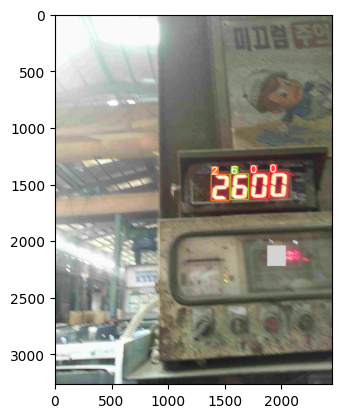

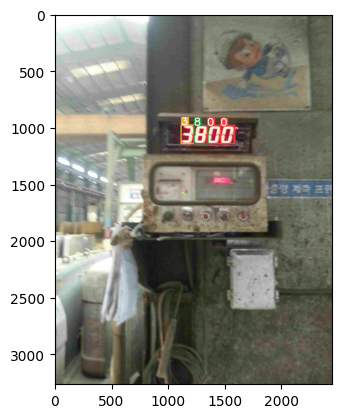

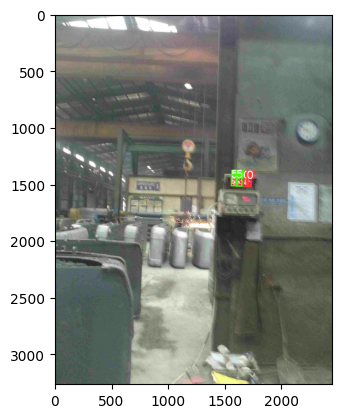

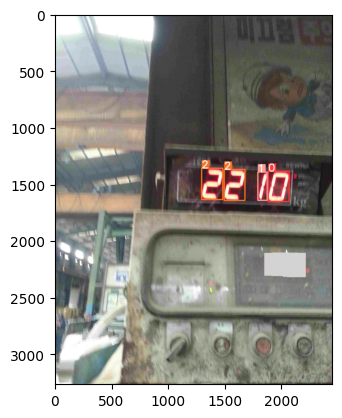

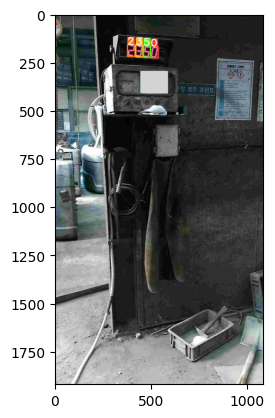

In [ ]:
# 지정된 폴더에서 이미지를 로드합니다. 폴더 경로는 오른쪽 클릭 후 'copy (file) path'로 확인할 수 있습니다.
test_predict_path = f'{project}/{test_inference_name}'

# glob 함수를 이용하여 지정 폴더 내의 모든 jpg 파일을 가져옵니다.
# 이미지 폴더 내의 jpg 형식을 가진 모든 파일을 읽어들입니다.
all_test_predict_list = glob.glob(test_predict_path+'/*jpg')

# randome 함수를 통해 전체 이미지에서 10개를 임의로 추출합니다.
sample_list = random.sample(all_test_predict_list, 5)

# matplotlib의 imread 함수는 파일의 경로를 입력받아 (높이, 너비, 채널 수)의 3차원 배열 형태로 반환합니다.
# matplotlib의 imshow 함수는 넘파이 배열을 입력받아 이미지를 사용자가 보기쉬운 사이즈로 조정하여 보여주며, 실제 크기를 짐작할수 있도록 눈금을 제공합니다.
for random_image_path in sample_list:
    image = plt.imread(random_image_path)
    plt.imshow(image)
    plt.show()

# Inference with Real Test dataset

In [ ]:
real_test_inference_name = "real_test_predict"

In [ ]:
image_paths = glob.glob('./dataset/data/real_test_images/*jpg')
# 설정한 배치 크기
batch_size = 4

real_test_inference_results = []
# 이미지 경로를 배치 크기에 맞춰 분할
for i in tqdm(range(0, len(image_paths), batch_size)):
    batch_paths = image_paths[i:i + batch_size]
    results = model.predict(project="./runs/detect", source=batch_paths,
    name=real_test_inference_name,
    device='cuda',
    imgsz=832,
    save=True,
    save_txt=True,
    save_conf=True,
    show_conf=False,
    exist_ok=True)

    # 결과에서 원본 이미지 삭제하여 메모리 절약
    for item in results:
        del item.orig_img
    real_test_inference_results.append(results)

# 배치사이즈 만큼 묶여 있는 리스트를 풀어줌
real_test_inference_results = sum(real_test_inference_results,[])

  0%|          | 0/98 [00:00<?, ?it/s]


0: 832x640 2 0s, 1 3, 1 6, 1: 832x640 1 0, 1 1, 1 2, 1 6, 2: 832x640 1 0, 1 3, 1 6, 1 8, 3: 832x640 2 0s, 1 3, 1 8, 28.7ms
Speed: 4.0ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
4 labels saved to runs/detect/real_test_predict/labels


  1%|          | 1/98 [00:01<01:43,  1.07s/it]


0: 832x640 1 0, 2 1s, 1 5, 1: 832x640 1 0, 1 2, 1 6, 1 8, 2: 832x640 3 0s, 1 1, 1 7, 3: 832x640 1 0, 1 5, 28.2ms
Speed: 4.2ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
8 labels saved to runs/detect/real_test_predict/labels


  2%|▏         | 2/98 [00:02<01:56,  1.21s/it]


0: 832x640 1 0, 1 2, 1 6, 1 9, 1: 832x640 1 0, 1 2, 1 3, 1 4, 2: 832x640 2 0s, 1 2, 1 6, 3: 832x640 2 0s, 1 3, 1 8, 28.1ms
Speed: 6.1ms preprocess, 7.0ms inference, 1.8ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
12 labels saved to runs/detect/real_test_predict/labels


  3%|▎         | 3/98 [00:04<02:17,  1.45s/it]


0: 832x640 2 0s, 3 5s, 1: 832x640 2 0s, 1 1, 1 9, 2: 832x640 2 0s, 1 5, 1 6, 3: 832x640 1 0, 28.1ms
Speed: 5.9ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
16 labels saved to runs/detect/real_test_predict/labels


  4%|▍         | 4/98 [00:05<02:25,  1.55s/it]


0: 832x640 2 0s, 1 2, 1 6, 1: 832x640 2 0s, 1 7, 2: 832x640 1 0, 2 1s, 1 7, 1 9, 3: 832x640 3 0s, 1 7, 28.1ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.9ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
20 labels saved to runs/detect/real_test_predict/labels


  5%|▌         | 5/98 [00:06<02:10,  1.41s/it]


0: 832x640 1 0, 1 2, 1: 832x640 1 0, 1 1, 3 3s, 1 8, 2: 832x640 1 0, 1 1, 1 3, 1 6, 3: 832x640 1 0, 1 3, 1 5, 1 8, 28.0ms
Speed: 4.0ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
24 labels saved to runs/detect/real_test_predict/labels


  6%|▌         | 6/98 [00:07<01:57,  1.28s/it]


0: 832x640 2 0s, 1 1, 1 3, 1: 832x640 1 0, 1 2, 1 3, 1 7, 2: 832x640 1 0, 1 1, 1 2, 1 5, 3: 832x640 1 0, 1 2, 2 6s, 28.1ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
28 labels saved to runs/detect/real_test_predict/labels


  7%|▋         | 7/98 [00:09<01:48,  1.20s/it]


0: 832x640 1 0, 1 2, 1 3, 1 8, 1: 832x640 1 0, 1 1, 1 3, 1 6, 2: 832x640 3 0s, 1 1, 1 7, 3: 832x640 2 0s, 1 2, 1 7, 28.0ms
Speed: 4.0ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
32 labels saved to runs/detect/real_test_predict/labels


  8%|▊         | 8/98 [00:10<01:43,  1.15s/it]


0: 832x832 2 0s, 1 2, 1 5, 1: 832x832 1 0, 1 2, 1 3, 1 4, 2: 832x832 2 0s, 2 2s, 3: 832x832 1 0, 1 3, 2 4s, 36.3ms
Speed: 4.4ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/real_test_predict
36 labels saved to runs/detect/real_test_predict/labels


  9%|▉         | 9/98 [00:10<01:33,  1.05s/it]


0: 832x640 1 0, 1 3, 1 4, 1 8, 1: 832x640 2 0s, 1 4, 1 6, 2: 832x640 1 0, 1 3, 1 4, 1 6, 3: 832x640 1 0, 2 3s, 1 4, 28.9ms
Speed: 4.2ms preprocess, 7.2ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
40 labels saved to runs/detect/real_test_predict/labels


 10%|█         | 10/98 [00:11<01:32,  1.05s/it]


0: 832x640 1 0, 1 1, 1 3, 1 9, 1: 832x640 2 0s, 1 3, 1 8, 2: 832x640 3 0s, 1 4, 1 7, 3: 832x640 1 0, 1 2, 1 5, 1 6, 28.1ms
Speed: 4.4ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
44 labels saved to runs/detect/real_test_predict/labels


 11%|█         | 11/98 [00:12<01:30,  1.04s/it]


0: 832x640 1 0, 1 1, 1 3, 1 6, 1: 832x640 2 0s, 1 2, 1 3, 2: 832x640 1 0, 1 3, 1 4, 1 8, 3: 832x640 2 0s, 1 4, 1 5, 28.0ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
48 labels saved to runs/detect/real_test_predict/labels


 12%|█▏        | 12/98 [00:13<01:29,  1.04s/it]


0: 832x832 1 0, 3 6s, 1: 832x832 1 0, 1 1, 1 3, 1 8, 2: 832x832 1 0, 1 1, 1 3, 1 5, 3: 832x832 1 0, 1 2, 1 3, 1 7, 36.4ms
Speed: 4.6ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/real_test_predict
52 labels saved to runs/detect/real_test_predict/labels


 13%|█▎        | 13/98 [00:14<01:24,  1.01it/s]


0: 832x640 2 0s, 2 3s, 1: 832x640 2 0s, 1 3, 1 5, 2: 832x640 1 0, 1 1, 1 3, 1 8, 3: 832x640 1 0, 1 3, 1 5, 1 8, 28.8ms
Speed: 4.4ms preprocess, 7.2ms inference, 2.4ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
56 labels saved to runs/detect/real_test_predict/labels


 14%|█▍        | 14/98 [00:15<01:24,  1.01s/it]


0: 832x640 1 0, 2 1s, 1 9, 1: 832x640 2 0s, 1 3, 1 8, 2: 832x640 2 0s, 1 1, 1 2, 3: 832x640 1 0, 1 1, 1 3, 1 8, 28.1ms
Speed: 6.1ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
60 labels saved to runs/detect/real_test_predict/labels


 15%|█▌        | 15/98 [00:17<01:36,  1.16s/it]


0: 832x640 2 0s, 1 1, 1 7, 1: 832x640 2 0s, 1 3, 1 8, 2: 832x640 2 0s, 1 3, 1 6, 1 8, 3: 832x640 1 0, 2 2s, 1 5, 28.1ms
Speed: 6.1ms preprocess, 7.0ms inference, 1.9ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
64 labels saved to runs/detect/real_test_predict/labels


 16%|█▋        | 16/98 [00:19<01:46,  1.30s/it]


0: 832x640 2 0s, 1 2, 1 6, 1: 832x640 2 0s, 1 1, 1 3, 1 7, 2: 832x640 2 0s, 2 1s, 1 7, 3: 832x640 1 0, 1 1, 1 2, 1 6, 28.4ms
Speed: 6.1ms preprocess, 7.1ms inference, 1.8ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
68 labels saved to runs/detect/real_test_predict/labels


 17%|█▋        | 17/98 [00:20<01:54,  1.41s/it]


0: 832x640 1 0, 2 3s, 1 9, 1: 832x640 2 0s, 2 6s, 2: 832x640 1 0, 1 1, 1 5, 1 6, 3: 832x640 1 0, 1 2, 2 5s, 28.0ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
72 labels saved to runs/detect/real_test_predict/labels


 18%|█▊        | 18/98 [00:21<01:44,  1.30s/it]


0: 832x640 1 0, 1 1, 1 5, 1 6, 1: 832x640 1 0, 1 2, 1 4, 1 6, 2: 832x640 1 0, 1 1, 1 2, 1 6, 3: 832x640 1 0, 1 2, 1 3, 1 6, 28.1ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
76 labels saved to runs/detect/real_test_predict/labels


 19%|█▉        | 19/98 [00:22<01:36,  1.23s/it]


0: 832x640 2 0s, 1 5, 1 6, 1: 832x640 1 0, 1 3, 1 5, 1 8, 2: 832x640 2 0s, 1 4, 1 5, 3: 832x640 1 0, 1 2, 1 5, 1 6, 28.0ms
Speed: 4.3ms preprocess, 7.0ms inference, 1.9ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
80 labels saved to runs/detect/real_test_predict/labels


 20%|██        | 20/98 [00:23<01:32,  1.18s/it]


0: 832x640 2 0s, 1 3, 1 8, 1: 832x640 2 0s, 1 2, 1 6, 2: 832x640 2 0s, 1 3, 1 5, 3: 832x640 1 0, 1 1, 1 3, 1 5, 28.0ms
Speed: 4.6ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
84 labels saved to runs/detect/real_test_predict/labels


 21%|██▏       | 21/98 [00:24<01:26,  1.13s/it]


0: 832x640 1 0, 1 3, 1 6, 1 8, 1: 832x640 1 0, 1 2, 1 3, 1 5, 2: 832x640 2 0s, 2 1s, 1 7, 3: 832x640 1 0, 1 2, 1 3, 1 6, 28.1ms
Speed: 4.3ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
88 labels saved to runs/detect/real_test_predict/labels


 22%|██▏       | 22/98 [00:25<01:23,  1.10s/it]


0: 832x832 1 0, 2 1s, 1 7, 1: 832x832 1 0, 1 2, 2 6s, 2: 832x832 2 0s, 1 4, 1 5, 3: 832x832 1 0, 1 3, 1 4, 1 5, 36.4ms
Speed: 4.5ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/real_test_predict
92 labels saved to runs/detect/real_test_predict/labels


 23%|██▎       | 23/98 [00:26<01:17,  1.03s/it]


0: 832x640 1 0, 2 2s, 1 5, 1: 832x640 1 0, 1 3, 1 4, 1 5, 2: 832x640 1 0, 2 3s, 1 8, 3: 832x640 1 0, 1 1, 1 3, 1 6, 28.7ms
Speed: 4.2ms preprocess, 7.2ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
96 labels saved to runs/detect/real_test_predict/labels


 24%|██▍       | 24/98 [00:27<01:16,  1.04s/it]


0: 832x640 1 0, 1 2, 1 4, 1 6, 1: 832x640 1 0, 1 3, 1 4, 1 6, 2: 832x640 1 0, 1 1, 1 3, 1 8, 3: 832x640 2 0s, 1 2, 1 6, 28.1ms
Speed: 4.4ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
100 labels saved to runs/detect/real_test_predict/labels


 26%|██▌       | 25/98 [00:28<01:15,  1.03s/it]


0: 832x640 2 0s, 1 2, 1 6, 1: 832x640 1 0, 1 3, 1 4, 1 8, 2: 832x640 3 0s, 1 7, 3: 832x640 1 0, 3 1s, 1 2, 1 7, 28.0ms
Speed: 4.2ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
104 labels saved to runs/detect/real_test_predict/labels


 27%|██▋       | 26/98 [00:29<01:14,  1.03s/it]


0: 832x640 1 0, 1 2, 1 3, 1 8, 1: 832x640 1 0, 1 3, 1 5, 1 8, 2: 832x640 1 0, 1 1, 1 3, 1 8, 3: 832x640 1 0, 1 3, 1 5, 1 8, 28.0ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
108 labels saved to runs/detect/real_test_predict/labels


 28%|██▊       | 27/98 [00:31<01:15,  1.06s/it]


0: 832x640 1 0, 1 1, 1 5, 1 7, 1: 832x640 1 0, 1 1, 1 3, 1 8, 2: 832x640 1 0, 1 2, 1 6, 1 7, 3: 832x640 1 0, 1 2, 1 4, 1 7, 37.2ms
Speed: 10.7ms preprocess, 9.3ms inference, 4.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
112 labels saved to runs/detect/real_test_predict/labels


 29%|██▊       | 28/98 [00:32<01:29,  1.28s/it]


0: 832x640 2 0s, 1 6, 1 7, 1: 832x640 1 0, 1 2, 1 3, 1 8, 2: 832x640 1 0, 1 1, 1 3, 1 6, 3: 832x640 2 0s, 1 3, 1 4, 28.8ms
Speed: 6.6ms preprocess, 7.2ms inference, 2.4ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
116 labels saved to runs/detect/real_test_predict/labels


 30%|██▉       | 29/98 [00:34<01:36,  1.40s/it]


0: 832x640 1 0, 1 2, 1 3, 1 6, 1: 832x640 1 0, 1 1, 1 4, 1 6, 2: 832x640 2 0s, 1 3, 1 7, 3: 832x640 1 0, 1 2, 1 3, 28.2ms
Speed: 6.4ms preprocess, 7.1ms inference, 2.1ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
120 labels saved to runs/detect/real_test_predict/labels


 31%|███       | 30/98 [00:35<01:34,  1.40s/it]


0: 832x640 2 0s, 1 4, 1 6, 1: 832x640 2 0s, 1 3, 1 8, 2: 832x640 1 0, 1 4, 1 5, 1 9, 3: 832x640 1 0, 1 1, 1 4, 1 7, 28.1ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
124 labels saved to runs/detect/real_test_predict/labels


 32%|███▏      | 31/98 [00:37<01:28,  1.32s/it]


0: 832x832 1 0, 3 2s, 1: 832x832 2 0s, 1 2, 1 6, 2: 832x832 1 0, 2 3s, 1 4, 3: 832x832 2 0s, 1 2, 1 3, 36.2ms
Speed: 4.6ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/real_test_predict
128 labels saved to runs/detect/real_test_predict/labels


 33%|███▎      | 32/98 [00:37<01:17,  1.17s/it]


0: 832x640 1 0, 1 4, 1 5, 1 6, 1: 832x640 1 0, 1 4, 1 5, 1 6, 2: 832x640 2 0s, 2 2s, 3: 832x640 1 0, 1 5, 2 9s, 28.7ms
Speed: 4.3ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
132 labels saved to runs/detect/real_test_predict/labels


 34%|███▎      | 33/98 [00:38<01:13,  1.13s/it]


0: 832x640 1 0, 1 1, 1 5, 1 6, 1: 832x640 1 0, 1 1, 1 4, 1 5, 2: 832x640 2 0s, 1 2, 1 5, 3: 832x640 1 0, 1 1, 1 5, 1 6, 28.3ms
Speed: 4.1ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
136 labels saved to runs/detect/real_test_predict/labels


 35%|███▍      | 34/98 [00:39<01:10,  1.09s/it]


0: 832x832 1 0, 2 1s, 2 5s, 2 6s, 1: 832x832 1 0, 1 1, 1 3, 1 8, 2: 832x832 1 0, 1 5, 3: 832x832 2 0s, 1 1, 1 9, 36.1ms
Speed: 4.4ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/real_test_predict
140 labels saved to runs/detect/real_test_predict/labels


 36%|███▌      | 35/98 [00:40<01:04,  1.02s/it]


0: 832x832 1 0, 1 2, 1 3, 1 5, 1: 832x832 1 0, 1 4, 1 5, 1 6, 2: 832x832 2 0s, 1 3, 1 8, 3: 832x832 1 0, 1 3, 1 4, 1 6, 35.9ms
Speed: 4.4ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/real_test_predict
144 labels saved to runs/detect/real_test_predict/labels


 37%|███▋      | 36/98 [00:41<01:00,  1.03it/s]


0: 832x640 1 0, 2 1s, 1 3, 1 8, 1: 832x640 1 0, 1 1, 1 4, 1 5, 2: 832x640 1 0, 1 2, 1 3, 1 6, 3: 832x640 1 0, 1 1, 1 2, 1 3, 28.8ms
Speed: 4.2ms preprocess, 7.2ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
148 labels saved to runs/detect/real_test_predict/labels


 38%|███▊      | 37/98 [00:42<00:59,  1.02it/s]


0: 832x640 2 0s, 1 3, 1 5, 1: 832x640 2 0s, 2 1s, 1 5, 2: 832x640 1 0, 1 1, 1 5, 1 6, 3: 832x640 1 0, 1 2, 1 4, 1 5, 28.1ms
Speed: 4.2ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
152 labels saved to runs/detect/real_test_predict/labels


 39%|███▉      | 38/98 [00:43<00:59,  1.01it/s]


0: 832x640 1 0, 1 2, 1 3, 1 8, 1: 832x640 1 0, 2 1s, 1 7, 2: 832x640 1 0, 1 2, 1 7, 1 9, 3: 832x640 1 0, 2 3s, 1 8, 28.0ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
156 labels saved to runs/detect/real_test_predict/labels


 40%|███▉      | 39/98 [00:44<00:59,  1.00s/it]


0: 832x832 1 0, 1 3, 1 6, 1 8, 1: 832x832 2 0s, 1 1, 1 2, 2: 832x832 1 0, 1 1, 1 3, 1 6, 3: 832x832 2 0s, 1 3, 1 5, 36.2ms
Speed: 4.5ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/real_test_predict
160 labels saved to runs/detect/real_test_predict/labels


 41%|████      | 40/98 [00:45<00:56,  1.03it/s]


0: 832x640 2 0s, 1 3, 1 8, 1: 832x640 2 0s, 1 1, 1 7, 2: 832x640 1 0, 1 1, 1 3, 1 5, 3: 832x640 1 0, 1 2, 1 6, 1 9, 32.1ms
Speed: 5.9ms preprocess, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
164 labels saved to runs/detect/real_test_predict/labels


 42%|████▏     | 41/98 [00:47<01:06,  1.17s/it]


0: 832x640 2 0s, 1 2, 1 5, 1: 832x640 1 0, 1 2, 1 4, 1 6, 2: 832x640 1 0, 1 4, 1 6, 1 9, 3: 832x640 1 0, 1 4, 1 5, 1 9, 28.1ms
Speed: 6.1ms preprocess, 7.0ms inference, 2.1ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
168 labels saved to runs/detect/real_test_predict/labels


 43%|████▎     | 42/98 [00:48<01:14,  1.34s/it]


0: 832x640 1 0, 1 3, 1 6, 1 8, 1: 832x640 3 0s, 1 1, 1 7, 2: 832x640 1 0, 2 2s, 1 6, 3: 832x640 1 0, 1 3, 2 4s, 28.1ms
Speed: 6.3ms preprocess, 7.0ms inference, 1.9ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
172 labels saved to runs/detect/real_test_predict/labels


 44%|████▍     | 43/98 [00:50<01:14,  1.36s/it]


0: 832x640 1 0, 1 1, 1 2, 1 5, 1: 832x640 1 0, 1 1, 1 4, 1 6, 2: 832x640 1 0, 1 2, 2 6s, 3: 832x640 3 0s, 1 1, 1 7, 28.0ms
Speed: 4.2ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
176 labels saved to runs/detect/real_test_predict/labels


 45%|████▍     | 44/98 [00:51<01:07,  1.26s/it]


0: 832x640 1 0, 1 3, 1 7, 1 8, 1: 832x640 2 0s, 1 3, 1 6, 2: 832x640 2 0s, 1 3, 1 8, 3: 832x640 2 0s, 1 3, 1 4, 28.2ms
Speed: 6.3ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
180 labels saved to runs/detect/real_test_predict/labels


 46%|████▌     | 45/98 [00:52<01:02,  1.19s/it]


0: 832x640 3 0s, 1 6, 1: 832x640 1 0, 1 2, 1 5, 1 6, 2: 832x640 1 0, 1 1, 1 3, 1 8, 3: 832x640 1 0, 1 4, 2 6s, 28.0ms
Speed: 4.4ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
184 labels saved to runs/detect/real_test_predict/labels


 47%|████▋     | 46/98 [00:53<00:59,  1.14s/it]


0: 832x832 3 0s, 1 1, 1 7, 1: 832x832 2 0s, 1 3, 1 8, 2: 832x832 1 0, 1 2, 1 4, 1 6, 3: 832x832 1 0, 36.5ms
Speed: 4.5ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/real_test_predict
188 labels saved to runs/detect/real_test_predict/labels


 48%|████▊     | 47/98 [00:54<00:54,  1.07s/it]


0: 832x640 1 0, 1 3, 1 4, 1 8, 1: 832x640 1 0, 1 4, 1 5, 1 6, 2: 832x640 2 0s, 1 4, 1 5, 3: 832x640 2 0s, 1 1, 1 5, 28.9ms
Speed: 4.1ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
192 labels saved to runs/detect/real_test_predict/labels


 49%|████▉     | 48/98 [00:55<00:52,  1.06s/it]


0: 832x640 1 0, 2 1s, 1 9, 1: 832x640 1 0, 3 2s, 2: 832x640 1 0, 3 2s, 3: 832x640 1 0, 1 3, 1 4, 1 6, 28.1ms
Speed: 4.4ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
196 labels saved to runs/detect/real_test_predict/labels


 50%|█████     | 49/98 [00:56<00:51,  1.05s/it]


0: 832x640 1 0, 2 2s, 1 6, 1: 832x640 1 0, 1 1, 1 4, 1 6, 2: 832x640 1 0, 1 2, 1 4, 1 6, 3: 832x640 1 0, 1 3, 1 5, 1 6, 28.2ms
Speed: 4.2ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
200 labels saved to runs/detect/real_test_predict/labels


 51%|█████     | 50/98 [00:57<00:49,  1.04s/it]


0: 832x640 2 0s, 1 4, 1 6, 1: 832x640 1 0, 1 1, 1 4, 1 5, 2: 832x640 2 0s, 1 2, 1 6, 3: 832x640 1 0, 1 2, 1 3, 1 6, 28.1ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
204 labels saved to runs/detect/real_test_predict/labels


 52%|█████▏    | 51/98 [00:58<00:48,  1.03s/it]


0: 832x640 1 0, 1 1, 1 3, 1 9, 1: 832x640 1 0, 1 1, 1 3, 1 9, 2: 832x640 1 0, 1 4, 1 7, 1 9, 3: 832x640 1 0, 1 1, 2 2s, 28.1ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
208 labels saved to runs/detect/real_test_predict/labels


 53%|█████▎    | 52/98 [00:59<00:46,  1.02s/it]


0: 832x640 1 0, 1 2, 1 3, 1 5, 1: 832x640 1 0, 1 1, 1 3, 1 8, 2: 832x640 1 0, 1 1, 2 2s, 3: 832x640 1 0, 1 3, 1 5, 1 8, 28.1ms
Speed: 4.3ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
212 labels saved to runs/detect/real_test_predict/labels


 54%|█████▍    | 53/98 [01:00<00:49,  1.09s/it]


0: 832x640 1 0, 1 1, 1 2, 1 9, 1: 832x640 1 0, 1 2, 1 3, 1 6, 2: 832x640 1 0, 1 3, 1 6, 1 7, 3: 832x640 1 0, 1 4, 2 5s, 30.6ms
Speed: 6.1ms preprocess, 7.7ms inference, 1.9ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
216 labels saved to runs/detect/real_test_predict/labels


 55%|█████▌    | 54/98 [01:02<00:55,  1.27s/it]


0: 832x640 1 0, 1 3, 1 4, 1 8, 1: 832x640 1 0, 1 2, 1 3, 1 6, 2: 832x640 (no detections), 3: 832x640 2 0s, 1 3, 1 6, 28.2ms
Speed: 5.9ms preprocess, 7.0ms inference, 1.7ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
219 labels saved to runs/detect/real_test_predict/labels


 56%|█████▌    | 55/98 [01:04<00:59,  1.39s/it]


0: 832x640 1 0, 1 2, 1 3, 1 6, 1: 832x640 1 0, 1 3, 1 5, 1 6, 2: 832x640 1 0, 2 2s, 1 6, 3: 832x640 2 0s, 1 2, 1 6, 28.1ms
Speed: 4.6ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
223 labels saved to runs/detect/real_test_predict/labels


 57%|█████▋    | 56/98 [01:05<00:56,  1.34s/it]


0: 832x640 1 0, 2 1s, 1 9, 1: 832x640 1 0, 1 2, 1 4, 1 6, 2: 832x640 2 0s, 1 3, 1 8, 3: 832x640 1 0, 2 3s, 1 6, 28.1ms
Speed: 4.2ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
227 labels saved to runs/detect/real_test_predict/labels


 58%|█████▊    | 57/98 [01:06<00:50,  1.24s/it]


0: 832x640 1 0, 1 2, 1 4, 1 6, 1: 832x640 1 0, 1 1, 1 3, 1 8, 2: 832x640 2 0s, 1 2, 3: 832x640 1 0, 1 1, 1 3, 1 8, 28.0ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
231 labels saved to runs/detect/real_test_predict/labels


 59%|█████▉    | 58/98 [01:07<00:46,  1.17s/it]


0: 832x640 1 0, 1 5, 1 7, 1 9, 1: 832x640 1 0, 1 1, 1 2, 1 9, 2: 832x640 1 0, 2 2s, 1 5, 3: 832x640 2 0s, 1 3, 1 8, 28.0ms
Speed: 4.3ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
235 labels saved to runs/detect/real_test_predict/labels


 60%|██████    | 59/98 [01:08<00:43,  1.12s/it]


0: 832x832 2 0s, 1 3, 1 8, 1: 832x832 1 0, 1 3, 1 5, 1 8, 2: 832x832 2 0s, 1 1, 1 5, 3: 832x832 3 0s, 1 2, 36.2ms
Speed: 4.4ms preprocess, 9.0ms inference, 1.9ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/real_test_predict
239 labels saved to runs/detect/real_test_predict/labels


 61%|██████    | 60/98 [01:09<00:39,  1.04s/it]


0: 832x640 1 0, 1 1, 1 3, 1 8, 1: 832x640 1 0, 1 3, 1 7, 1 9, 2: 832x640 1 0, 2 2s, 1 7, 3: 832x640 1 0, 1 2, 1 5, 1 9, 28.6ms
Speed: 4.1ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
243 labels saved to runs/detect/real_test_predict/labels


 62%|██████▏   | 61/98 [01:10<00:37,  1.03s/it]


0: 832x640 3 0s, 1 1, 1 7, 1: 832x640 2 0s, 1 1, 1 6, 2: 832x640 1 0, 1 1, 1 2, 1 6, 3: 832x640 2 0s, 1 3, 1 8, 28.0ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
247 labels saved to runs/detect/real_test_predict/labels


 63%|██████▎   | 62/98 [01:11<00:36,  1.02s/it]


0: 832x640 2 0s, 1 1, 1 9, 1: 832x640 2 0s, 1 3, 1 8, 2: 832x640 2 0s, 1 1, 1 2, 3: 832x640 3 0s, 1 1, 1 7, 28.1ms
Speed: 4.0ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
251 labels saved to runs/detect/real_test_predict/labels


 64%|██████▍   | 63/98 [01:12<00:35,  1.01s/it]


0: 832x640 2 0s, 2 2s, 1: 832x640 1 0, 1 3, 1 7, 1 8, 2: 832x640 2 0s, 1 3, 1 6, 3: 832x640 1 0, 2 2s, 1 5, 28.1ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
255 labels saved to runs/detect/real_test_predict/labels


 65%|██████▌   | 64/98 [01:13<00:34,  1.02s/it]


0: 832x832 1 0, 2 2s, 1 4, 1: 832x832 2 0s, 1 3, 1 4, 2: 832x832 1 0, 1 3, 1 4, 1 8, 3: 832x832 2 0s, 1 1, 1 2, 36.5ms
Speed: 4.4ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/real_test_predict
259 labels saved to runs/detect/real_test_predict/labels


 66%|██████▋   | 65/98 [01:13<00:31,  1.04it/s]


0: 832x640 1 0, 2 3s, 1 6, 1: 832x640 1 0, 3 2s, 2: 832x640 1 0, 2 3s, 1 8, 3: 832x640 2 0s, 1 6, 1 7, 29.1ms
Speed: 4.8ms preprocess, 7.3ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
263 labels saved to runs/detect/real_test_predict/labels


 67%|██████▋   | 66/98 [01:15<00:34,  1.07s/it]


0: 832x640 1 0, 1 3, 1 4, 1 6, 1: 832x640 2 0s, 1 3, 1 4, 2: 832x640 1 0, 2 2s, 1 3, 3: 832x640 1 0, 1 3, 1 4, 1 6, 28.1ms
Speed: 6.0ms preprocess, 7.0ms inference, 1.9ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
267 labels saved to runs/detect/real_test_predict/labels


 68%|██████▊   | 67/98 [01:16<00:38,  1.24s/it]


0: 832x640 1 0, 1 1, 1 3, 1 9, 1: 832x640 1 0, 1 5, 2: 832x640 1 0, 1 2, 1 5, 1 6, 3: 832x640 1 0, 1 2, 1 3, 1 5, 28.1ms
Speed: 6.0ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
271 labels saved to runs/detect/real_test_predict/labels


 69%|██████▉   | 68/98 [01:18<00:40,  1.35s/it]


0: 832x640 1 0, 1 1, 2 2s, 1: 832x640 2 0s, 1 3, 1 7, 2: 832x640 1 0, 1 1, 1 3, 1 6, 3: 832x640 1 0, 1 3, 1 5, 1 6, 28.7ms
Speed: 4.3ms preprocess, 7.2ms inference, 1.7ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
275 labels saved to runs/detect/real_test_predict/labels


 70%|███████   | 69/98 [01:19<00:38,  1.33s/it]


0: 832x832 2 0s, 1 3, 1 7, 1: 832x832 1 0, 1 1, 2 2s, 2: 832x832 2 0s, 1 3, 1 5, 3: 832x832 1 0, 1 1, 1 3, 1 6, 36.3ms
Speed: 4.7ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/real_test_predict
279 labels saved to runs/detect/real_test_predict/labels


 71%|███████▏  | 70/98 [01:20<00:33,  1.18s/it]


0: 832x640 2 0s, 2 2s, 1: 832x640 1 0, 1 3, 1 6, 1 8, 2: 832x640 1 0, 3 1s, 1 7, 3: 832x640 1 0, 1 3, 1 5, 1 6, 28.7ms
Speed: 4.0ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
283 labels saved to runs/detect/real_test_predict/labels


 72%|███████▏  | 71/98 [01:21<00:30,  1.13s/it]


0: 832x640 1 0, 1 3, 1 6, 1 8, 1: 832x640 1 0, 1 2, 1 4, 1 5, 2: 832x640 2 0s, 1 2, 1 4, 3: 832x640 1 0, 2 2s, 1 4, 28.1ms
Speed: 4.2ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
287 labels saved to runs/detect/real_test_predict/labels


 73%|███████▎  | 72/98 [01:22<00:28,  1.10s/it]


0: 832x640 2 0s, 1 3, 1 5, 1: 832x640 1 0, 1 2, 2 6s, 2: 832x640 1 0, 1 2, 3: 832x640 2 0s, 2 2s, 28.3ms
Speed: 4.1ms preprocess, 7.1ms inference, 2.0ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
291 labels saved to runs/detect/real_test_predict/labels


 74%|███████▍  | 73/98 [01:23<00:27,  1.08s/it]


0: 832x832 1 0, 1 5, 2 6s, 1: 832x832 2 0s, 1 3, 1 8, 2: 832x832 1 0, 1 1, 1 3, 1 5, 3: 832x832 1 0, 1 1, 1 4, 1 7, 36.1ms
Speed: 4.6ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/real_test_predict
295 labels saved to runs/detect/real_test_predict/labels


 76%|███████▌  | 74/98 [01:24<00:24,  1.03s/it]


0: 832x832 1 0, 1 2, 1 5, 1 6, 1: 832x832 1 0, 1 1, 1 5, 1 6, 2: 832x832 1 0, 1 2, 1 7, 1 9, 3: 832x832 1 0, 1 1, 1 4, 1 6, 35.6ms
Speed: 4.7ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/real_test_predict
299 labels saved to runs/detect/real_test_predict/labels


 77%|███████▋  | 75/98 [01:25<00:22,  1.03it/s]


0: 832x640 1 0, 2 1s, 1 3, 1 8, 1: 832x640 2 0s, 1 4, 1 5, 2: 832x640 2 0s, 1 3, 1 4, 3: 832x640 1 0, 1 3, 1 5, 1 6, 28.8ms
Speed: 4.5ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
303 labels saved to runs/detect/real_test_predict/labels


 78%|███████▊  | 76/98 [01:26<00:21,  1.01it/s]


0: 832x640 1 0, 3 1s, 1 7, 1: 832x640 1 0, 1 2, 1 4, 1 7, 2: 832x640 1 0, 1 3, 1 6, 1 7, 3: 832x640 1 0, 1 1, 1 3, 1 8, 28.0ms
Speed: 4.0ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
307 labels saved to runs/detect/real_test_predict/labels


 79%|███████▊  | 77/98 [01:27<00:21,  1.00s/it]


0: 832x640 1 0, 1 3, 1 5, 1 8, 1: 832x640 1 0, 1 1, 1 2, 1 6, 2: 832x640 1 0, 1 3, 1 4, 1 8, 3: 832x640 1 3, 28.3ms
Speed: 4.1ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
311 labels saved to runs/detect/real_test_predict/labels


 80%|███████▉  | 78/98 [01:28<00:20,  1.00s/it]


0: 832x640 2 0s, 1 1, 1 7, 1: 832x640 3 0s, 1 2, 2: 832x640 1 0, 1 3, 1 5, 1 8, 3: 832x640 1 0, 1 3, 1 4, 1 6, 28.1ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
315 labels saved to runs/detect/real_test_predict/labels


 81%|████████  | 79/98 [01:29<00:20,  1.09s/it]


0: 832x640 1 0, 1 2, 1 3, 1 5, 1: 832x640 1 0, 1 3, 1 4, 1 9, 2: 832x640 1 0, 1 1, 1 3, 1 6, 3: 832x640 2 0s, 1 5, 1 6, 28.1ms
Speed: 6.1ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
319 labels saved to runs/detect/real_test_predict/labels


 82%|████████▏ | 80/98 [01:31<00:22,  1.26s/it]


0: 832x640 1 0, 1 1, 1 2, 1 6, 1: 832x640 2 0s, 1 3, 1 6, 2: 832x640 1 0, 2 2s, 1 5, 3: 832x640 1 0, 1 1, 2 2s, 32.9ms
Speed: 13.8ms preprocess, 8.2ms inference, 3.7ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
323 labels saved to runs/detect/real_test_predict/labels


 83%|████████▎ | 81/98 [01:33<00:23,  1.40s/it]


0: 832x640 2 0s, 1 3, 1 6, 1: 832x640 2 0s, 1 3, 1 8, 2: 832x640 2 0s, 1 2, 1 3, 3: 832x640 2 0s, 1 2, 1 6, 28.2ms
Speed: 4.1ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
327 labels saved to runs/detect/real_test_predict/labels


 84%|████████▎ | 82/98 [01:34<00:21,  1.35s/it]


0: 832x832 2 0s, 1 3, 1 8, 1: 832x832 2 0s, 1 2, 1 5, 2: 832x832 1 0, 1 2, 1 3, 1 8, 3: 832x832 1 0, 1 1, 1 2, 1 7, 36.3ms
Speed: 4.5ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/real_test_predict
331 labels saved to runs/detect/real_test_predict/labels


 85%|████████▍ | 83/98 [01:35<00:17,  1.20s/it]


0: 832x640 1 0, 1 6, 1 7, 1 9, 1: 832x640 1 0, 1 4, 1 5, 1 6, 2: 832x640 1 0, 2 2s, 1 6, 3: 832x640 1 0, 1 4, 2 6s, 28.6ms
Speed: 4.1ms preprocess, 7.2ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
335 labels saved to runs/detect/real_test_predict/labels


 86%|████████▌ | 84/98 [01:36<00:16,  1.15s/it]


0: 832x640 1 0, 1 4, 1 5, 1 6, 1: 832x640 1 0, 1 1, 1 3, 1 4, 2: 832x640 1 0, 2 2s, 1 6, 3: 832x640 1 0, 1 3, 1 4, 1 8, 28.1ms
Speed: 4.2ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
339 labels saved to runs/detect/real_test_predict/labels


 87%|████████▋ | 85/98 [01:37<00:14,  1.12s/it]


0: 832x640 2 0s, 1 1, 1 2, 1: 832x640 1 0, 1 2, 1 4, 1 6, 2: 832x640 2 0s, 1 3, 1 8, 3: 832x640 1 0, 1 3, 1 4, 1 8, 28.2ms
Speed: 4.2ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
343 labels saved to runs/detect/real_test_predict/labels


 88%|████████▊ | 86/98 [01:38<00:13,  1.10s/it]


0: 832x640 1 0, 1 2, 1 3, 1 8, 1: 832x640 2 0s, 1 7, 1 9, 2: 832x640 1 0, 1 2, 1 3, 1 6, 3: 832x640 1 0, 1 1, 1 6, 1 7, 28.2ms
Speed: 4.7ms preprocess, 7.1ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
347 labels saved to runs/detect/real_test_predict/labels


 89%|████████▉ | 87/98 [01:39<00:11,  1.07s/it]


0: 832x640 1 0, 1 2, 1 3, 1 8, 1: 832x640 2 0s, 1 1, 1 3, 2: 832x640 1 0, 1 3, 1 5, 1 7, 3: 832x640 2 0s, 1 3, 1 8, 28.1ms
Speed: 4.2ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
351 labels saved to runs/detect/real_test_predict/labels


 90%|████████▉ | 88/98 [01:40<00:10,  1.06s/it]


0: 832x640 1 0, 1 1, 1 3, 1 9, 1: 832x640 1 0, 1 1, 1 3, 1 8, 2: 832x640 1 0, 3 2s, 3: 832x640 2 0s, 1 3, 1 5, 28.2ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
355 labels saved to runs/detect/real_test_predict/labels


 91%|█████████ | 89/98 [01:41<00:09,  1.06s/it]


0: 832x832 1 0, 1 2, 1 3, 1 8, 1: 832x832 1 0, 1 1, 1 3, 1 8, 2: 832x832 2 0s, 1 1, 1 6, 3: 832x832 1 0, 1 5, 2 6s, 36.3ms
Speed: 4.7ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/real_test_predict
359 labels saved to runs/detect/real_test_predict/labels


 92%|█████████▏| 90/98 [01:42<00:08,  1.03s/it]


0: 832x640 1 0, 1 1, 1 3, 1 6, 1: 832x640 1 0, 1 2, 1 4, 1 5, 2: 832x640 1 0, 1 2, 1 5, 1 6, 3: 832x640 1 0, 2 2s, 1 5, 28.6ms
Speed: 4.1ms preprocess, 7.2ms inference, 1.8ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
363 labels saved to runs/detect/real_test_predict/labels


 93%|█████████▎| 91/98 [01:43<00:07,  1.04s/it]


0: 832x640 2 0s, 1 2, 1 6, 1: 832x640 1 0, 1 2, 1 3, 1 8, 2: 832x640 1 0, 2 2s, 1 6, 3: 832x640 1 0, 1 1, 1 3, 1 5, 28.1ms
Speed: 6.2ms preprocess, 7.0ms inference, 2.2ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
367 labels saved to runs/detect/real_test_predict/labels


 94%|█████████▍| 92/98 [01:45<00:07,  1.19s/it]


0: 832x640 1 0, 1 1, 1 3, 1 7, 1: 832x640 2 0s, 1 1, 1 2, 2: 832x640 1 0, 1 2, 1 3, 1 8, 3: 832x640 1 0, 1 2, 1 3, 1 6, 28.1ms
Speed: 5.9ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
371 labels saved to runs/detect/real_test_predict/labels


 95%|█████████▍| 93/98 [01:46<00:06,  1.33s/it]


0: 832x832 1 0, 1 1, 1 5, 1 6, 1: 832x832 2 0s, 1 1, 1 7, 2: 832x832 1 0, 1 1, 1 5, 1 6, 3: 832x832 2 0s, 1 3, 1 6, 36.7ms
Speed: 6.4ms preprocess, 9.2ms inference, 2.3ms postprocess per image at shape (1, 3, 832, 832)
Results saved to runs/detect/real_test_predict
375 labels saved to runs/detect/real_test_predict/labels


 96%|█████████▌| 94/98 [01:48<00:05,  1.35s/it]


0: 832x640 1 0, 1 1, 1 3, 1 8, 1: 832x640 1 0, 1 1, 1 3, 1 6, 2: 832x640 1 0, 3 2s, 3: 832x640 1 0, 1 1, 2 2s, 28.6ms
Speed: 4.1ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
379 labels saved to runs/detect/real_test_predict/labels


 97%|█████████▋| 95/98 [01:49<00:03,  1.28s/it]


0: 832x640 1 0, 2 3s, 1 8, 1: 832x640 1 0, 1 1, 1 2, 1 7, 2: 832x640 1 0, 1 3, 1 6, 1 8, 3: 832x640 2 0s, 2 2s, 28.1ms
Speed: 4.2ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
383 labels saved to runs/detect/real_test_predict/labels


 98%|█████████▊| 96/98 [01:50<00:02,  1.21s/it]


0: 832x640 1 0, 1 1, 1 3, 1 8, 1: 832x640 1 0, 1 3, 1 5, 1 6, 2: 832x640 2 0s, 1 3, 1 8, 3: 832x640 2 0s, 1 1, 1 7, 28.0ms
Speed: 4.1ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
387 labels saved to runs/detect/real_test_predict/labels


 99%|█████████▉| 97/98 [01:51<00:01,  1.15s/it]


0: 832x640 1 0, 2 2s, 1 3, 1: 832x640 1 0, 2 2s, 1 5, 17.0ms
Speed: 4.2ms preprocess, 8.5ms inference, 2.4ms postprocess per image at shape (1, 3, 832, 640)
Results saved to runs/detect/real_test_predict
389 labels saved to runs/detect/real_test_predict/labels


100%|██████████| 98/98 [01:51<00:00,  1.14s/it]


In [ ]:
# 함수 사용 (오직 큰 화면에 대한 라벨 정보만 비교 대상이므로 covered_images의 path를 입력)
test_label_path = './dataset/data/covered_images/test_data'

real_test_pred_label_accuracy, real_total_label, real_correct_label = compute_each_label_accuracy(test_label_path, real_test_inference_results)
print(f"Accuracy: {real_test_pred_label_accuracy*100:.4f}%")
print(f"Total Labels: {real_total_label}")
print(f"Correctly Predicted Labels: {real_correct_label}")

Accuracy: 96.4308%
Total Labels: 1569
Correctly Predicted Labels: 1513


**실제 테스트셋에 대한 정확도(개별 라벨 기준)는 95% 이상**

In [ ]:
# 함수 사용
real_test_pred_image_accuracy, real_total_images, real_correct_images = compute_image_accuracy(test_label_path, real_test_inference_results)
print(f"Accuracy: {real_test_pred_image_accuracy*100:.4f}%")
print(f"Total Images: {real_total_images}")
print(f"Correctly Predicted Images: {real_correct_images}")

Accuracy: 94.1026%
Total Images: 390
Correctly Predicted Images: 367


**실제 테스트셋에 대한 정확도(이미지 단위 기준)는 약 94% 측정됨**

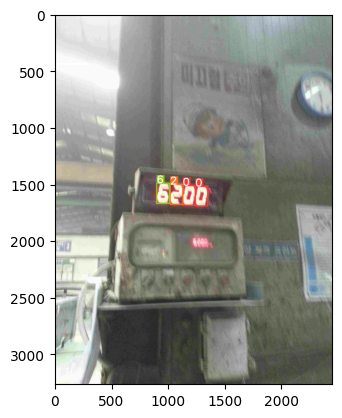

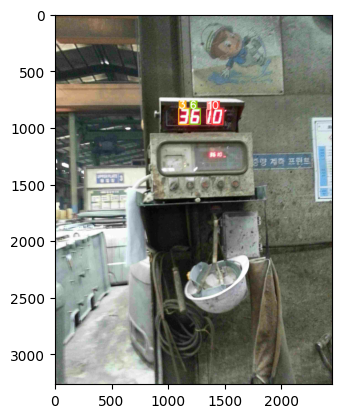

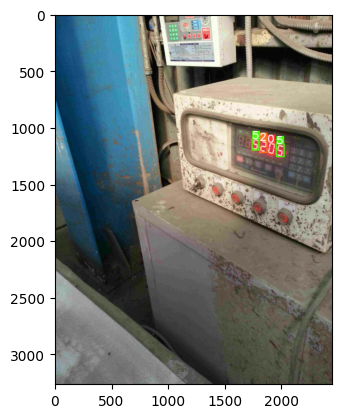

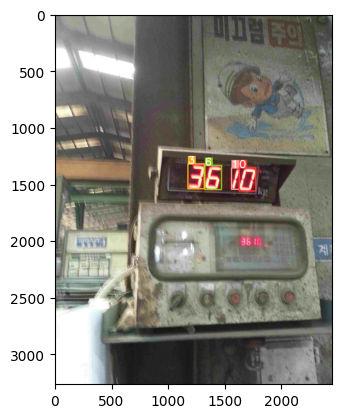

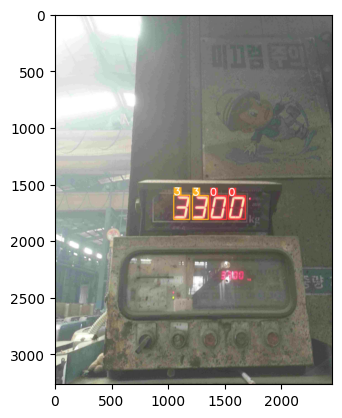

In [ ]:
# 지정된 폴더에서 이미지를 로드합니다. 폴더 경로는 오른쪽 클릭 후 'copy (file) path'로 확인할 수 있습니다.
real_test_predict_path = f'{project}/{real_test_inference_name}'

# glob 함수를 이용하여 지정 폴더 내의 모든 jpg 파일을 가져옵니다.
# 이미지 폴더 내의 jpg 형식을 가진 모든 파일을 읽어들입니다.
all_real_test_predict_list = glob.glob(real_test_predict_path+'/*jpg')

# randome 함수를 통해 전체 이미지에서 10개를 임의로 추출합니다.
sample_list = random.sample(all_real_test_predict_list, 5)

# matplotlib의 imread 함수는 파일의 경로를 입력받아 (높이, 너비, 채널 수)의 3차원 배열 형태로 반환합니다.
# matplotlib의 imshow 함수는 넘파이 배열을 입력받아 이미지를 사용자가 보기쉬운 사이즈로 조정하여 보여주며, 실제 크기를 짐작할수 있도록 눈금을 제공합니다.
# 시각화 결과 대부분 이미지에서 탐지가 제대로 되었음을 알 수 있습니다.
for random_image_path in sample_list:
    image = plt.imread(random_image_path)
    plt.imshow(image)
    plt.show()